### Import all the libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import plotly.express as px
from mpl_toolkits import mplot3d
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,cross_validate
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
import warnings
warnings.filterwarnings('ignore')


### Load the dataset:

In [2]:
application = pd.read_csv("application_record.csv")
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [3]:
print("Number of rows", application.shape[0])
print("Number of columns", application.shape[1])

Number of rows 438557
Number of columns 18


In [4]:
print("Duplicated data:",{application.ID.duplicated().any()})


Duplicated data: {True}


In [5]:
application.drop_duplicates('ID',keep = 'first', inplace = True )

In [6]:
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [7]:
application = application.reset_index(drop=True)
application.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [8]:
print("Number of rows after removing duplicates", application.shape[0])
print("Number of columns after removing duplicates", application.shape[1])

Number of rows after removing duplicates 438510
Number of columns after removing duplicates 18


In [9]:
credit_df = pd.read_csv("credit_record.csv")
credit_df.head()

ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

In [10]:
LE = LabelEncoder()

In [11]:
credit_df['STATUS']= LE.fit_transform(credit_df['STATUS'].astype(str))
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype
---  ------          --------------    -----
 0   ID              1048575 non-null  int64
 1   MONTHS_BALANCE  1048575 non-null  int64
 2   STATUS          1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [12]:
#credit_df.drop('MONTHS_BALANCE', axis = 1, inplace = True)

In [13]:
credit_df['STATUS'].replace(['C', 'X'],0, inplace=True)

In [14]:
print("Duplicated data:",{credit_df.ID.duplicated().any()})

Duplicated data: {True}


In [15]:
print("Number of rows", credit_df.shape[0])
print("Number of columns", credit_df.shape[1])

Number of rows 1048575
Number of columns 3


In [16]:
credit = credit_df.groupby('ID').agg(max).reset_index()
credit.head() 

ID  MONTHS_BALANCE  STATUS
0  5001711               0       7
1  5001712               0       6
2  5001713               0       7
3  5001714               0       7
4  5001715               0       7

In [17]:
print("Number of rows after removing duplicates", credit.shape[0])
print("Number of columns after removing duplicates",credit.shape[1])

Number of rows after removing duplicates 45985
Number of columns after removing duplicates 3


### Merging Two dataset:

In [18]:
mydata = application.merge(credit,on= 'ID')
mydata.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
0              2.0               0       7  
1              2.0               0       7  
2              2.0               0       7  
3              1.0               0       7  
4              1.0             -22       7

In [19]:
print("Number of rows", mydata.shape[0])
print("Number of columns", mydata.shape[1])

Number of rows 36457
Number of columns 20


In [20]:
#print("Duplicated data:" ,{mydata.index.duplicated().any()})

#mydata = list(mydata.index)

####  Check Datatypes:

#### Numeric Features:

In [21]:
mydata.columns[(mydata.dtypes !='object').values].tolist()

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'MONTHS_BALANCE',
 'STATUS']

### Categorical Features:

In [22]:
for i in mydata.columns[(mydata.dtypes =='object').values].tolist():
    print(i,'\n')
    print(mydata[i].value_counts())
    print('-----------------------------------------------')
    

CODE_GENDER 

F    24430
M    12027
Name: CODE_GENDER, dtype: int64
-----------------------------------------------
FLAG_OWN_CAR 

N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------------------
FLAG_OWN_REALTY 

Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------------------
NAME_INCOME_TYPE 

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64
-----------------------------------------------
NAME_EDUCATION_TYPE 

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------------------------------------
NAME_FAMILY_STATUS 

Married                 25048
Single / not married     4829
Ci

#### Visualizing Categorical variable total count:
    

#### CODE_GENDER Count:

([<matplotlib.patches.Wedge at 0x7ffbe8964df0>,
 [Text(-0.5602563743351331, 0.9466323441636945, 'Female'),
  Text(0.5602563743351331, -0.9466323441636946, 'Male')],
 [Text(-0.30559438600098165, 0.5163449149983788, '67.01%'),
  Text(0.30559438600098165, -0.5163449149983789, '32.99%')])

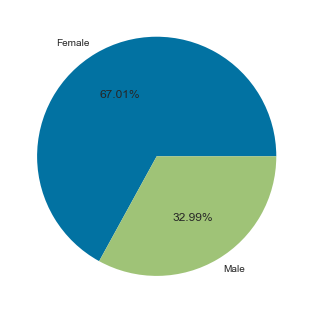

In [23]:
plt.pie(mydata['CODE_GENDER'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')

##### NAME_INCOME_TYPE Count:

([<matplotlib.patches.Wedge at 0x7ffbe3e06430>,
 [Text(-0.05594916302333328, 1.0985762109007224, 'Working'),
  Text(-0.7396198522188606, -0.8142250758873439, 'Commercial associate'),
  Text(0.5506838377905776, -0.9522328028356516, 'Pensioner'),
  Text(1.063277145409221, -0.2818540616177429, 'State servant'),
  Text(1.099999505715993, -0.0010427965147598564, 'Student')],
 [Text(-0.030517725285454513, 0.5992233877640304, '51.62%'),
  Text(-0.40342901030119666, -0.4441227686658239, '23.29%'),
  Text(0.3003730024312241, -0.519399710637628, '16.87%'),
  Text(0.5799693520413932, -0.15373857906422336, '8.19%'),
  Text(0.5999997303905417, -0.0005687980989599216, '0.03%')])

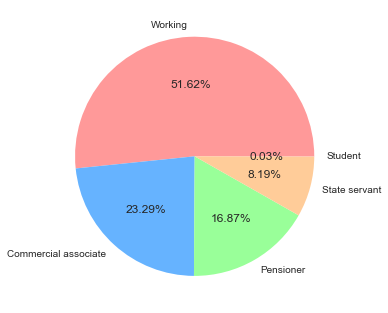

In [24]:
plt.pie(mydata['NAME_INCOME_TYPE'].value_counts(), labels=['Working', 'Commercial associate','Pensioner','State servant','Student'], autopct='%1.2f%%',colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99'])

#### NAME_HOUSING_TYPE

([<matplotlib.patches.Wedge at 0x7ffbe3f04370>,
 [Text(-1.0381810727628487, 0.36356575767937904, 'House / apartment '),
  Text(0.9542431649728385, -0.5471928198566026, 'With parents'),
  Text(1.0600277738995736, -0.2938385927027192, 'Municipal apartment'),
  Text(1.0916005560473383, -0.1356769178495078, 'Rented apartment'),
  Text(1.098539821456324, -0.05665916231914935, 'Office apartment'),
  Text(1.0998847320855107, -0.01592407376221483, 'Co-op apartment')],
 [Text(-0.5662805851433719, 0.1983085950978431, '89.3%'),
  Text(0.5204962718033664, -0.2984688108308741, '4.9%'),
  Text(0.5781969675815856, -0.160275596019665, '3.1%'),
  Text(0.5954184851167299, -0.07400559155427698, '1.6%'),
  Text(0.5992035389761767, -0.030904997628626914, '0.7%'),
  Text(0.5999371265920967, -0.008685858415753542, '0.5%')])

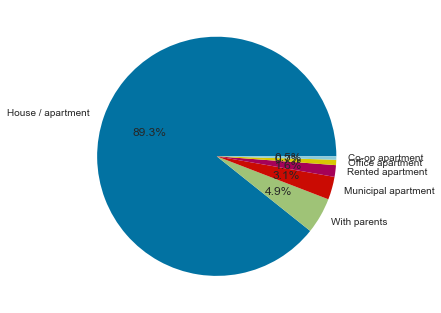

In [25]:
plt.pie(mydata['NAME_HOUSING_TYPE'].value_counts(), labels=['House / apartment ', 'With parents','Municipal apartment','Rented apartment','Office apartment','Co-op apartment'] , autopct='%1.1f%%')

In [26]:
#sns_plot = sns.distplot(application["NAME_EDUCATION_TYPE"]) univariate numberical 

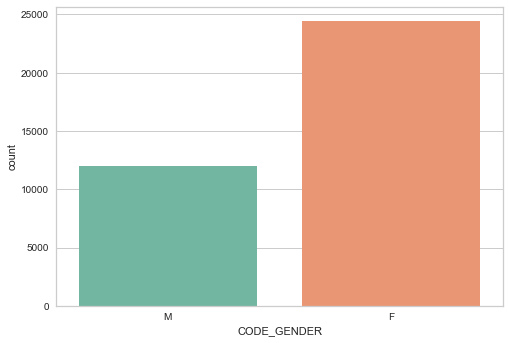

In [27]:
sns.countplot(mydata['CODE_GENDER'],palette="Set2")

### OCCUPATION_TYPE

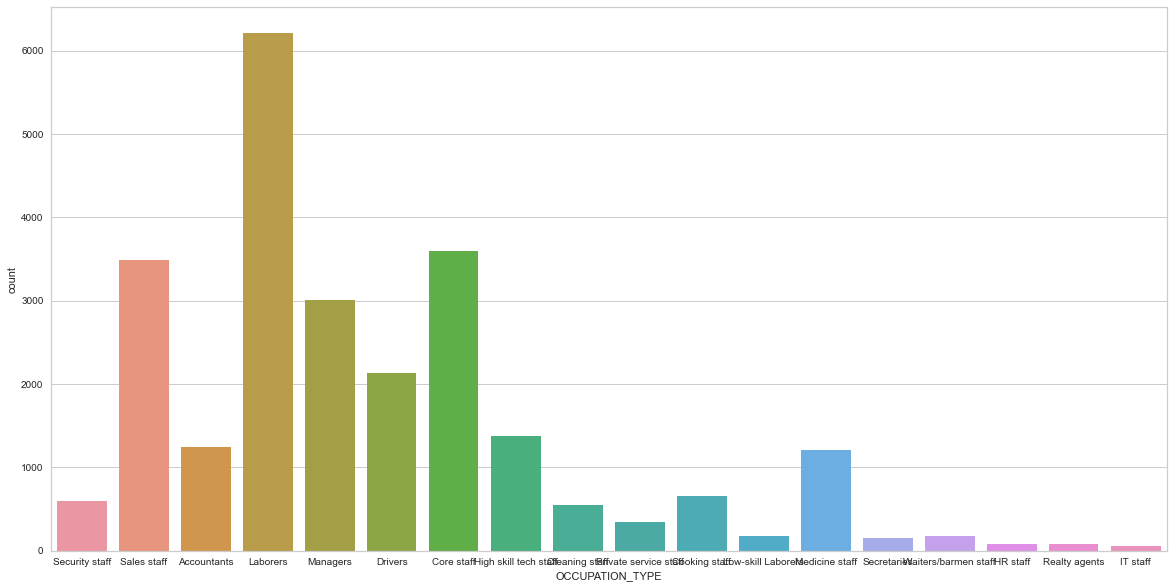

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(mydata['OCCUPATION_TYPE'])

### FLAG_OWN_CAR

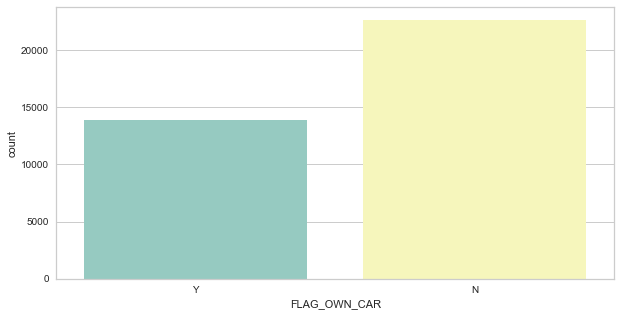

In [29]:
plt.figure(figsize = (10,5))
sns.countplot(mydata['FLAG_OWN_CAR'],palette="Set3")

### STATUS

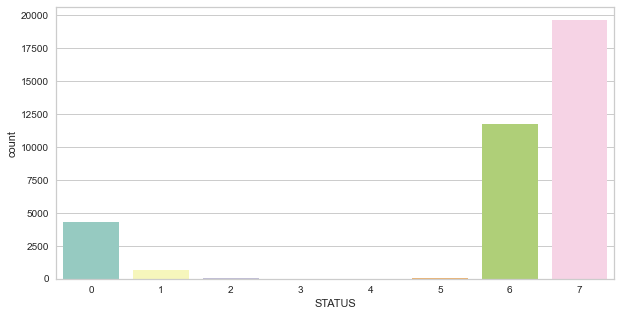

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(mydata['STATUS'],palette="Set3")

<Figure size 2160x1440 with 0 Axes>

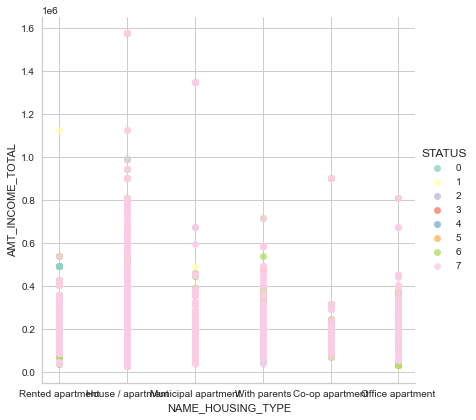

In [31]:
plt.figure(figsize = (30,20))
sns.lmplot(x='NAME_HOUSING_TYPE', y='AMT_INCOME_TOTAL', data=mydata,
          fit_reg=False,
          hue='STATUS',
          legend=True,
          palette="Set3",height=6)

### Plotting Occupation type based on gender:

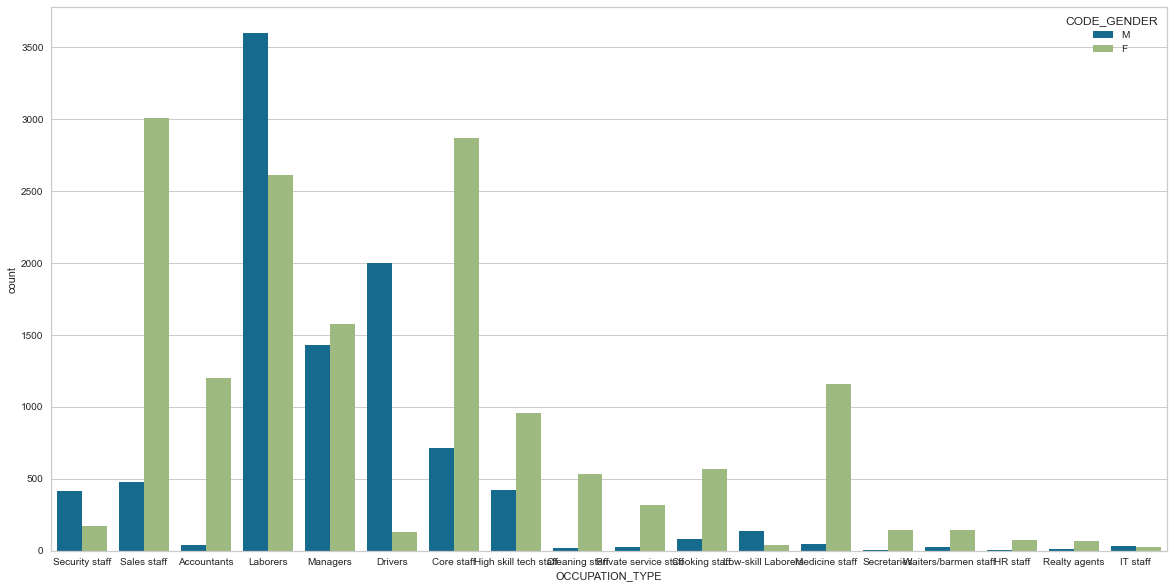

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x='OCCUPATION_TYPE', data=mydata,
             hue="CODE_GENDER")
plt.show()

### Plotting Occupation type based on status:

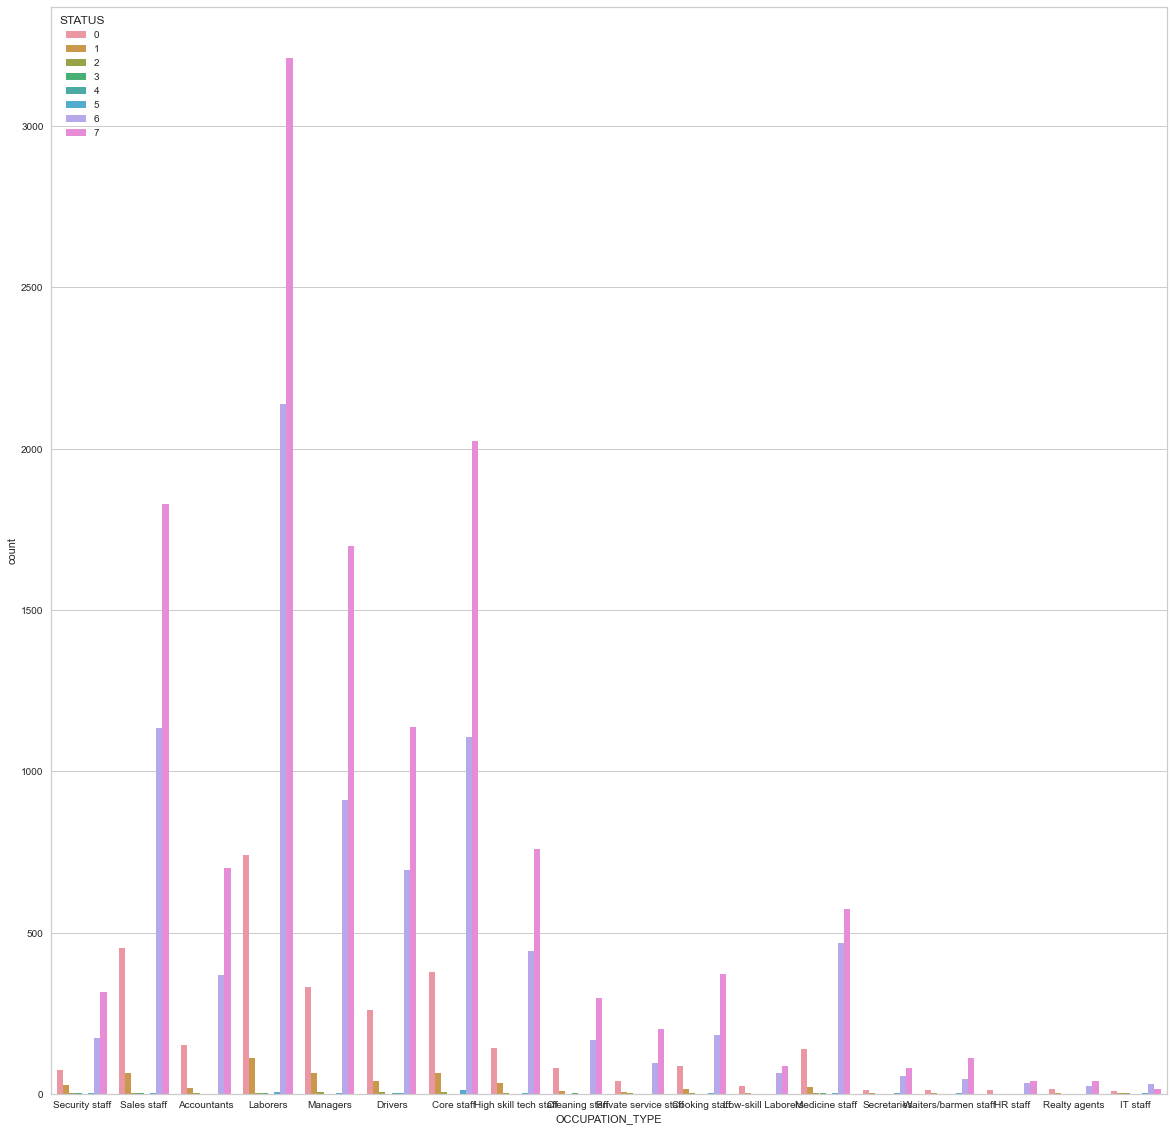

In [33]:
plt.figure(figsize=(20,20))
sns.countplot(x='OCCUPATION_TYPE', data=mydata,
             hue="STATUS")
plt.show()

### Plotting name_income_type based on code gender:

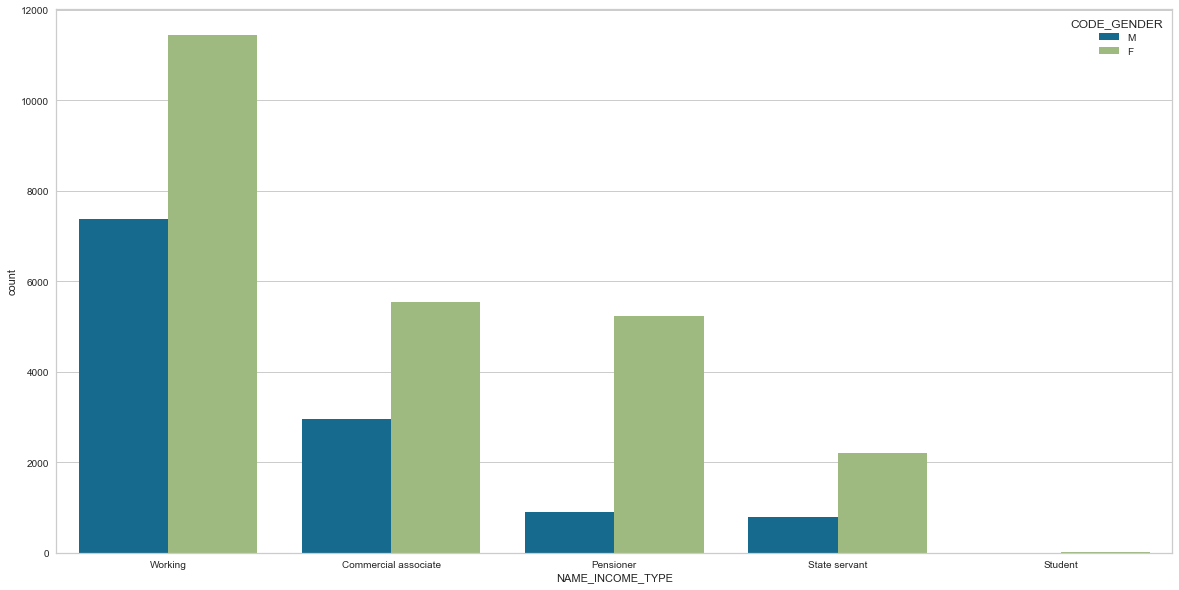

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x='NAME_INCOME_TYPE', data=mydata,
             hue="CODE_GENDER")
plt.show()

### Plotting occupation_type based on code gender:

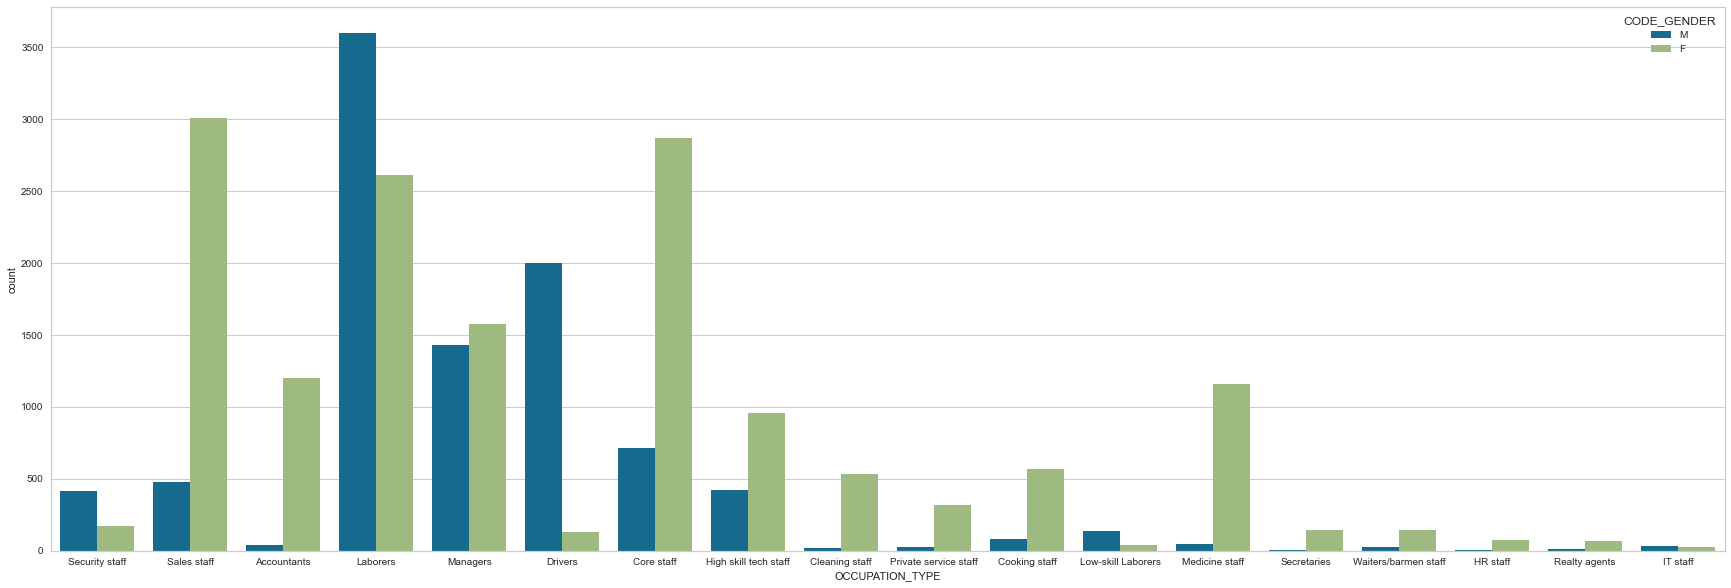

In [35]:
plt.figure(figsize=(30,10))
sns.countplot(x='OCCUPATION_TYPE', data=mydata,
             hue="CODE_GENDER")
plt.show()

### Plotting Name_education_type based on code gender

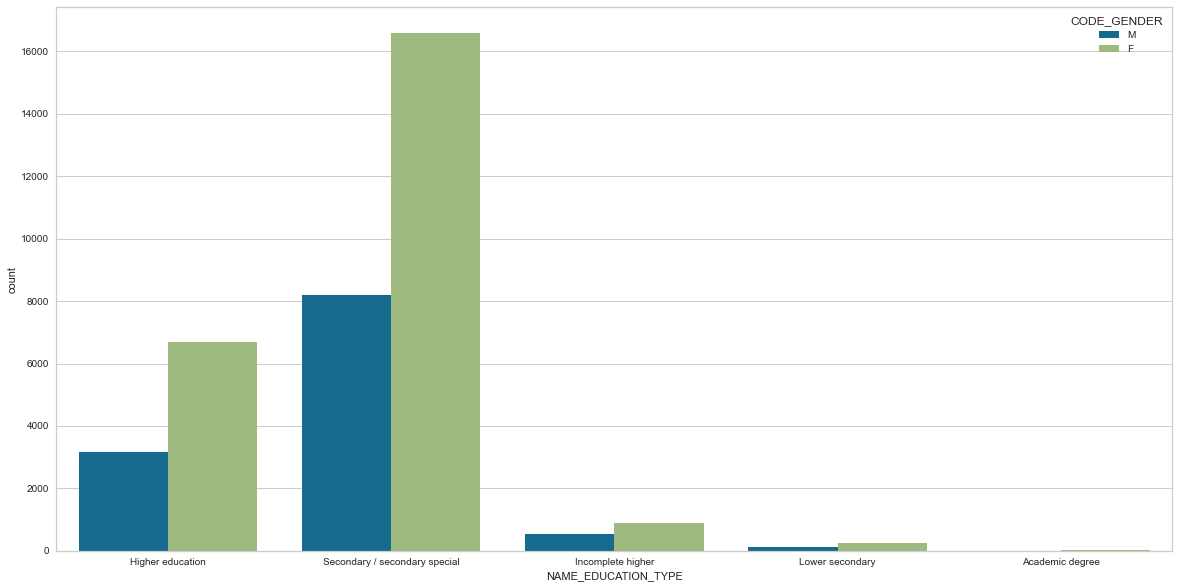

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='NAME_EDUCATION_TYPE', data=mydata,
             hue="CODE_GENDER")
plt.show()

##### Plotting Name_housing_type based on code gender

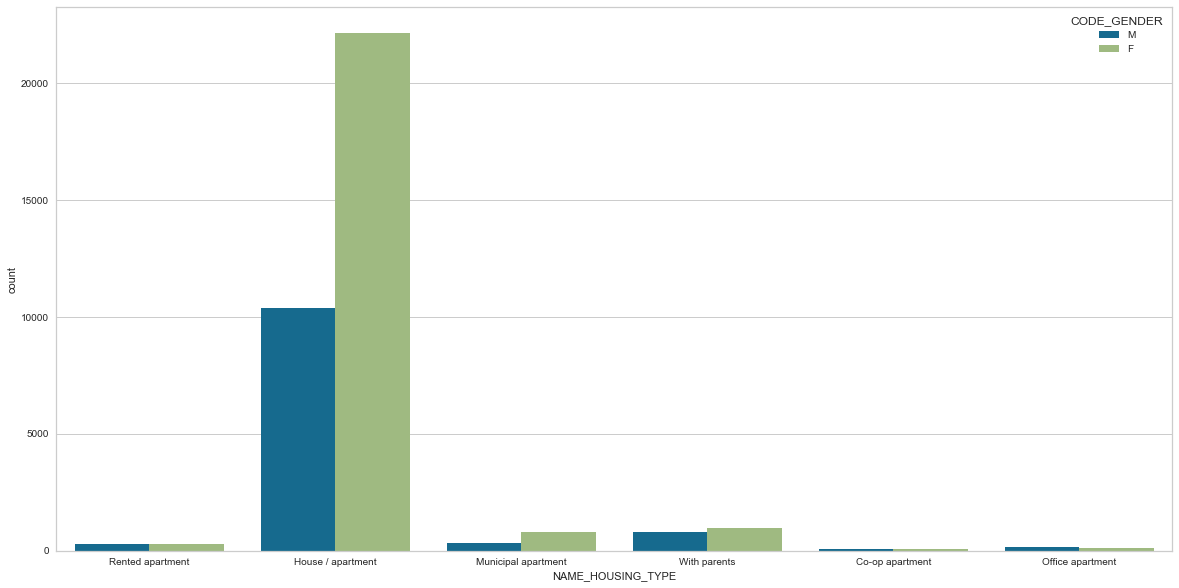

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='NAME_HOUSING_TYPE', data=mydata,
             hue="CODE_GENDER")
plt.show()

#### Plotting Name_housing_type based on status

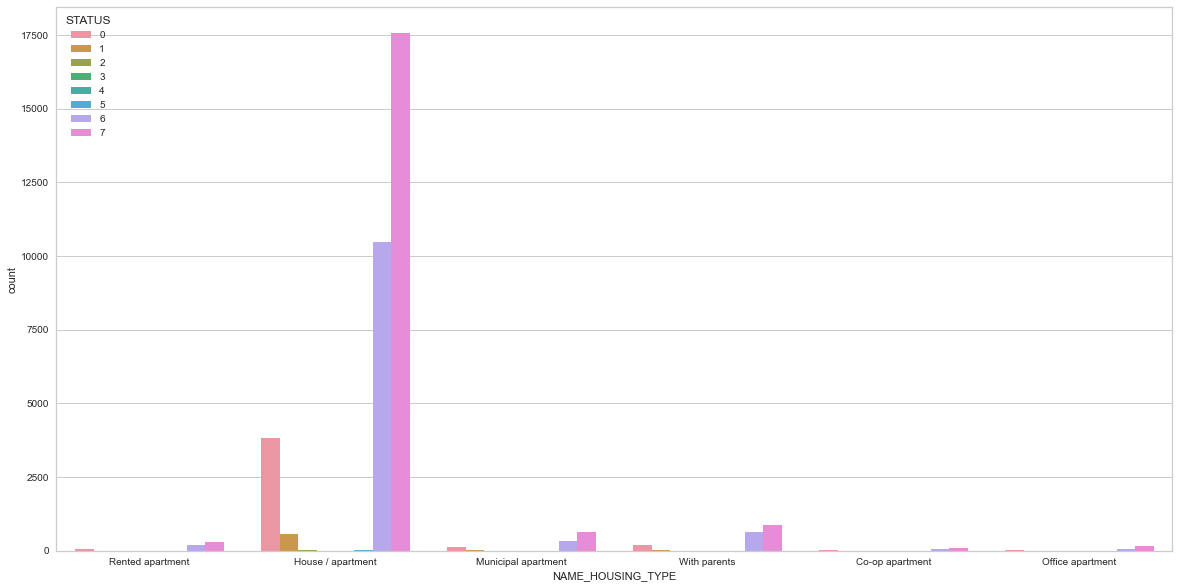

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(x='NAME_HOUSING_TYPE', data=mydata,
             hue="STATUS")
plt.show()

### Categroical variables:  Object Datatype variable in dataset:

In [39]:
objList = mydata.select_dtypes(include = "object").columns # only columns with object datatypes
print (objList)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')


#### Label Encoder: Convert categorical into numerical values:

In [40]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in objList:
    mydata[i] = LE.fit_transform(mydata[i].astype(str))
mydata.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804            1             1                1             0   
1  5008805            1             1                1             0   
2  5008806            1             1                1             0   
3  5008808            0             0                1             0   
4  5008809            0             0                1             0   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          427500.0                 4                    1   
1          427500.0                 4                    1   
2          112500.0                 4                    4   
3          270000.0                 0                    4   
4          270000.0                 0                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  4      -12005          -4542   
1                   0                  4      -12005          -4542   
2                   1                  1      -21474          -1134   
3                   3                  1      -19110          -3051   
4                   3                  1      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0           1                1           0           0               18   
1           1                1           0           0               18   
2           1                0           0           0               16   
3           1                0           1           1               14   
4           1                0           1           1               14   

   CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
0              2.0               0       7  
1              2.0               0       7  
2              2.0               0       7  
3              1.0               0       7  
4              1.0             -22       7

### % of Applications submitted based on Children count'

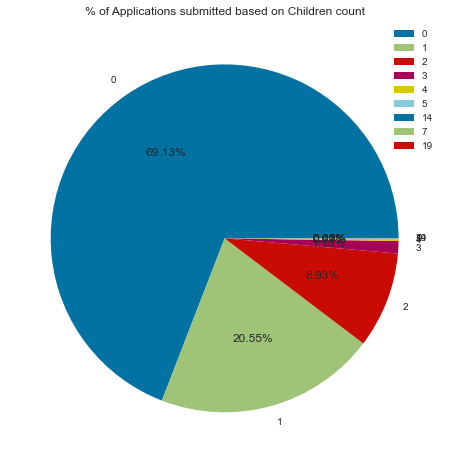

In [41]:
plt.figure(figsize = (8,8))
plt.pie(mydata ['CNT_CHILDREN'].value_counts(), labels=mydata['CNT_CHILDREN'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

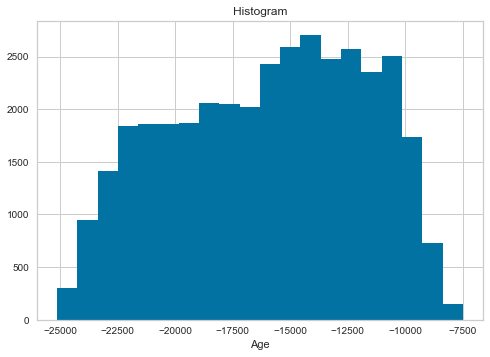

In [42]:
plt.hist(mydata['DAYS_BIRTH'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

### Null Value:

In [43]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

### Statistical Summary:

In [44]:
mydata.describe()

ID   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  3.645700e+04  36457.000000  36457.000000     36457.000000   
mean   5.078227e+06      0.329895      0.379708         0.672189   
std    4.187524e+04      0.470181      0.485321         0.469422   
min    5.008804e+06      0.000000      0.000000         0.000000   
25%    5.042028e+06      0.000000      0.000000         0.000000   
50%    5.074614e+06      0.000000      0.000000         1.000000   
75%    5.115396e+06      1.000000      1.000000         1.000000   
max    5.150487e+06      1.000000      1.000000         1.000000   

       CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
count  36457.000000      3.645700e+04      36457.000000         36457.000000   
mean       0.430315      1.866857e+05          2.398195             3.097183   
std        0.742367      1.017892e+05          1.734032             1.341292   
min        0.000000      2.700000e+04          0.000000             0.000000   
25%        0.000000      1.215000e+05          1.000000             1.000000   
50%        0.000000      1.575000e+05          4.000000             4.000000   
75%        1.000000      2.250000e+05          4.000000             4.000000   
max       19.000000      1.575000e+06          4.000000             4.000000   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE    DAYS_BIRTH  DAYS_EMPLOYED  \
count        36457.000000       36457.000000  36457.000000   36457.000000   
mean             1.367885           1.282881 -15975.173382   59262.935568   
std              0.954557           0.951675   4200.549944  137651.334859   
min              0.000000           0.000000 -25152.000000  -15713.000000   
25%              1.000000           1.000000 -19438.000000   -3153.000000   
50%              1.000000           1.000000 -15563.000000   -1552.000000   
75%              1.000000           1.000000 -12462.000000    -408.000000   
max              4.000000           5.000000  -7489.000000  365243.000000   

       FLAG_MOBIL  FLAG_WORK_PHONE    FLAG_PHONE    FLAG_EMAIL  \
count     36457.0     36457.000000  36457.000000  36457.000000   
mean          1.0         0.225526      0.294813      0.089722   
std           0.0         0.417934      0.455965      0.285787   
min           1.0         0.000000      0.000000      0.000000   
25%           1.0         0.000000      0.000000      0.000000   
50%           1.0         0.000000      0.000000      0.000000   
75%           1.0         0.000000      1.000000      0.000000   
max           1.0         1.000000      1.000000      1.000000   

       OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE        STATUS  
count     36457.000000     36457.000000    36457.000000  36457.000000  
mean         10.901692         2.198453       -5.831802      5.736210  
std           5.974049         0.911686       11.326494      2.274937  
min           0.000000         1.000000      -60.000000      0.000000  
25%           6.000000         2.000000       -6.000000      6.000000  
50%          10.000000         2.000000        0.000000      7.000000  
75%          18.000000         3.000000        0.000000      7.000000  
max          18.000000        20.000000        0.000000      7.000000

### Check Datatypes:

In [45]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

### Convert status datatype:

In [46]:
mydata['STATUS']= LE.fit_transform(mydata['STATUS'].astype(str))
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   FLAG_OWN_CAR         36457 non-null  int64  
 3   FLAG_OWN_REALTY      36457 non-null  int64  
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_EDUCATION_TYPE  36457 non-null  int64  
 8   NAME_FAMILY_STATUS   36457 non-null  int64  
 9   NAME_HOUSING_TYPE    36457 non-null  int64  
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [47]:
mydata.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804            1             1                1             0   
1  5008805            1             1                1             0   
2  5008806            1             1                1             0   
3  5008808            0             0                1             0   
4  5008809            0             0                1             0   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          427500.0                 4                    1   
1          427500.0                 4                    1   
2          112500.0                 4                    4   
3          270000.0                 0                    4   
4          270000.0                 0                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   0                  4      -12005          -4542   
1                   0                  4      -12005          -4542   
2                   1                  1      -21474          -1134   
3                   3                  1      -19110          -3051   
4                   3                  1      -19110          -3051   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0           1                1           0           0               18   
1           1                1           0           0               18   
2           1                0           0           0               16   
3           1                0           1           1               14   
4           1                0           1           1               14   

   CNT_FAM_MEMBERS  MONTHS_BALANCE  STATUS  
0              2.0               0       7  
1              2.0               0       7  
2              2.0               0       7  
3              1.0               0       7  
4              1.0             -22       7

#### Drop Month_Balance:

In [48]:
mydata.drop('MONTHS_BALANCE',axis = 1,inplace = True)

### Boxplot:To detect outlier:

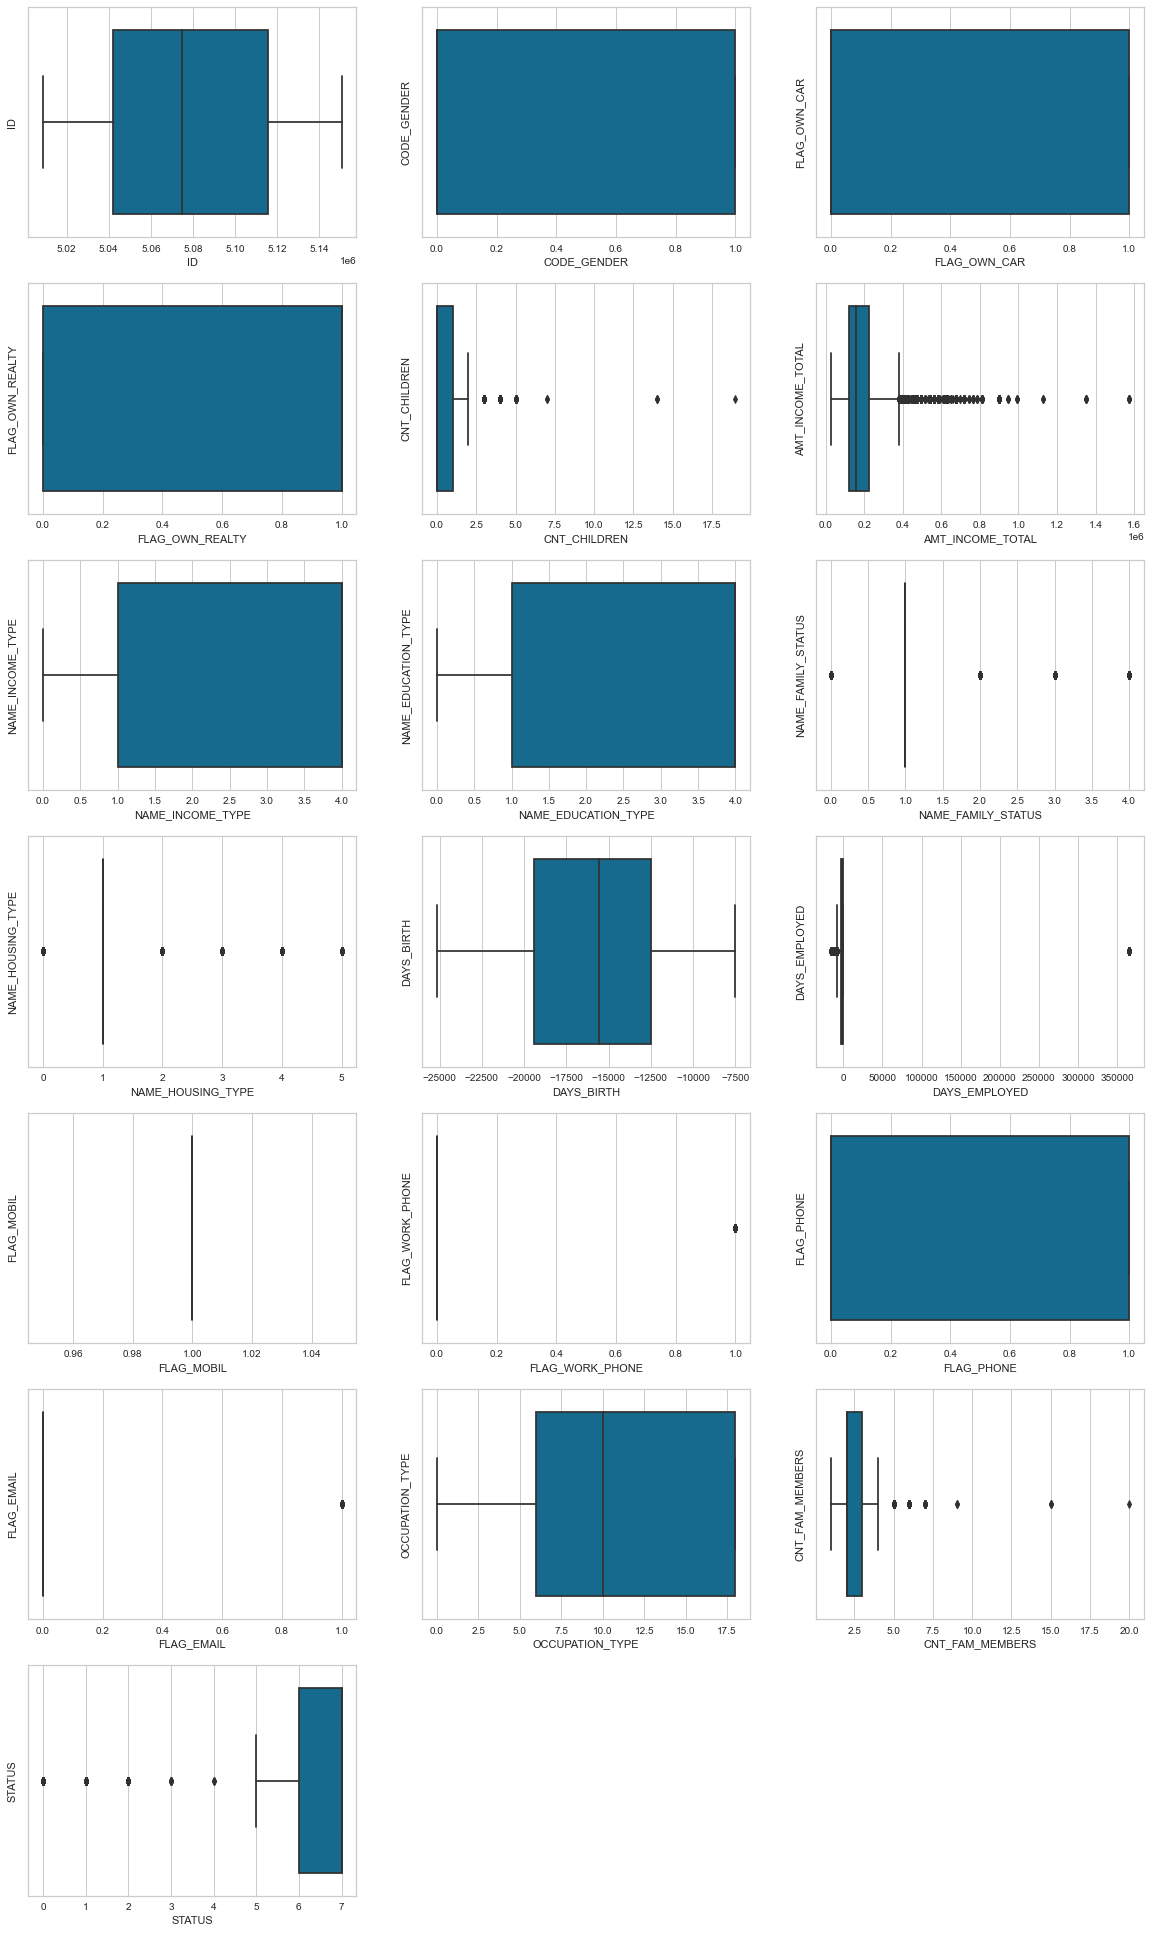

In [49]:
plt.figure(figsize=(20,50))
for i,col in enumerate(mydata,1):
    plt.subplot(10,3,i)
    sns.boxplot(mydata[col])
    plt.ylabel(col)
plt.show()

#### InterQuantile Range:

In [50]:
iqr_high = mydata['CNT_CHILDREN'].quantile(0.999)
iqr_low = mydata['CNT_CHILDREN'].quantile(0.001)
mydata = mydata[(mydata['CNT_CHILDREN']>iqr_low) & (mydata['CNT_CHILDREN']<iqr_high)]

In [51]:
income_high = mydata['AMT_INCOME_TOTAL'].quantile(0.999)
income_low = mydata['AMT_INCOME_TOTAL'].quantile(0.001)
mydata = mydata[(mydata['AMT_INCOME_TOTAL']>income_low) & (mydata['AMT_INCOME_TOTAL']<income_high)]

In [52]:
#FOR CNT_FAM_MEMBERS COLUMN
fam_high = mydata['CNT_FAM_MEMBERS'].quantile(0.999)
fam_low = mydata['CNT_FAM_MEMBERS'].quantile(0.001)
mydata= mydata[(mydata['CNT_FAM_MEMBERS']>fam_low) & (mydata['CNT_FAM_MEMBERS']<fam_high)]

### Datatset after removing outlier:

In [53]:
mydata.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
27  5008838            1             0                1             1   
28  5008839            1             0                1             1   
29  5008840            1             0                1             1   
30  5008841            1             0                1             1   
31  5008842            1             0                1             1   

    AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
27          405000.0                 0                    1   
28          405000.0                 0                    1   
29          405000.0                 0                    1   
30          405000.0                 0                    1   
31          405000.0                 0                    1   

    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
27                   1                  1      -11842          -2016   
28                   1                  1      -11842          -2016   
29                   1                  1      -11842          -2016   
30                   1                  1      -11842          -2016   
31                   1                  1      -11842          -2016   

    FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
27           1                0           0           0               10   
28           1                0           0           0               10   
29           1                0           0           0               10   
30           1                0           0           0               10   
31           1                0           0           0               10   

    CNT_FAM_MEMBERS  STATUS  
27              3.0       7  
28              3.0       6  
29              3.0       6  
30              3.0       7  
31              3.0       0

In [54]:
mydata = mydata.reset_index(drop=True)
mydata.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008838            1             0                1             1   
1  5008839            1             0                1             1   
2  5008840            1             0                1             1   
3  5008841            1             0                1             1   
4  5008842            1             0                1             1   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          405000.0                 0                    1   
1          405000.0                 0                    1   
2          405000.0                 0                    1   
3          405000.0                 0                    1   
4          405000.0                 0                    1   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   1                  1      -11842          -2016   
1                   1                  1      -11842          -2016   
2                   1                  1      -11842          -2016   
3                   1                  1      -11842          -2016   
4                   1                  1      -11842          -2016   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0           1                0           0           0               10   
1           1                0           0           0               10   
2           1                0           0           0               10   
3           1                0           0           0               10   
4           1                0           0           0               10   

   CNT_FAM_MEMBERS  STATUS  
0              3.0       7  
1              3.0       6  
2              3.0       6  
3              3.0       7  
4              3.0       0

### K means Clustering:

In [55]:
from sklearn.cluster import KMeans
Km_cluster=KMeans(2)
Km_cluster

KMeans(n_clusters=2)

In [56]:
Km_cluster.fit(mydata)

KMeans(n_clusters=2)

In [57]:
my_Cluster=mydata.copy()
my_Cluster['cluster']=Km_cluster.predict(my_Cluster)
my_Cluster.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008838            1             0                1             1   
1  5008839            1             0                1             1   
2  5008840            1             0                1             1   
3  5008841            1             0                1             1   
4  5008842            1             0                1             1   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          405000.0                 0                    1   
1          405000.0                 0                    1   
2          405000.0                 0                    1   
3          405000.0                 0                    1   
4          405000.0                 0                    1   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   1                  1      -11842          -2016   
1                   1                  1      -11842          -2016   
2                   1                  1      -11842          -2016   
3                   1                  1      -11842          -2016   
4                   1                  1      -11842          -2016   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0           1                0           0           0               10   
1           1                0           0           0               10   
2           1                0           0           0               10   
3           1                0           0           0               10   
4           1                0           0           0               10   

   CNT_FAM_MEMBERS  STATUS  cluster  
0              3.0       7        1  
1              3.0       6        1  
2              3.0       6        1  
3              3.0       7        1  
4              3.0       0        1

In [58]:
my_Cluster['cluster'].value_counts(normalize=True)

0    0.803917
1    0.196083
Name: cluster, dtype: float64

In [59]:
my_Cluster.shape

(9496, 20)

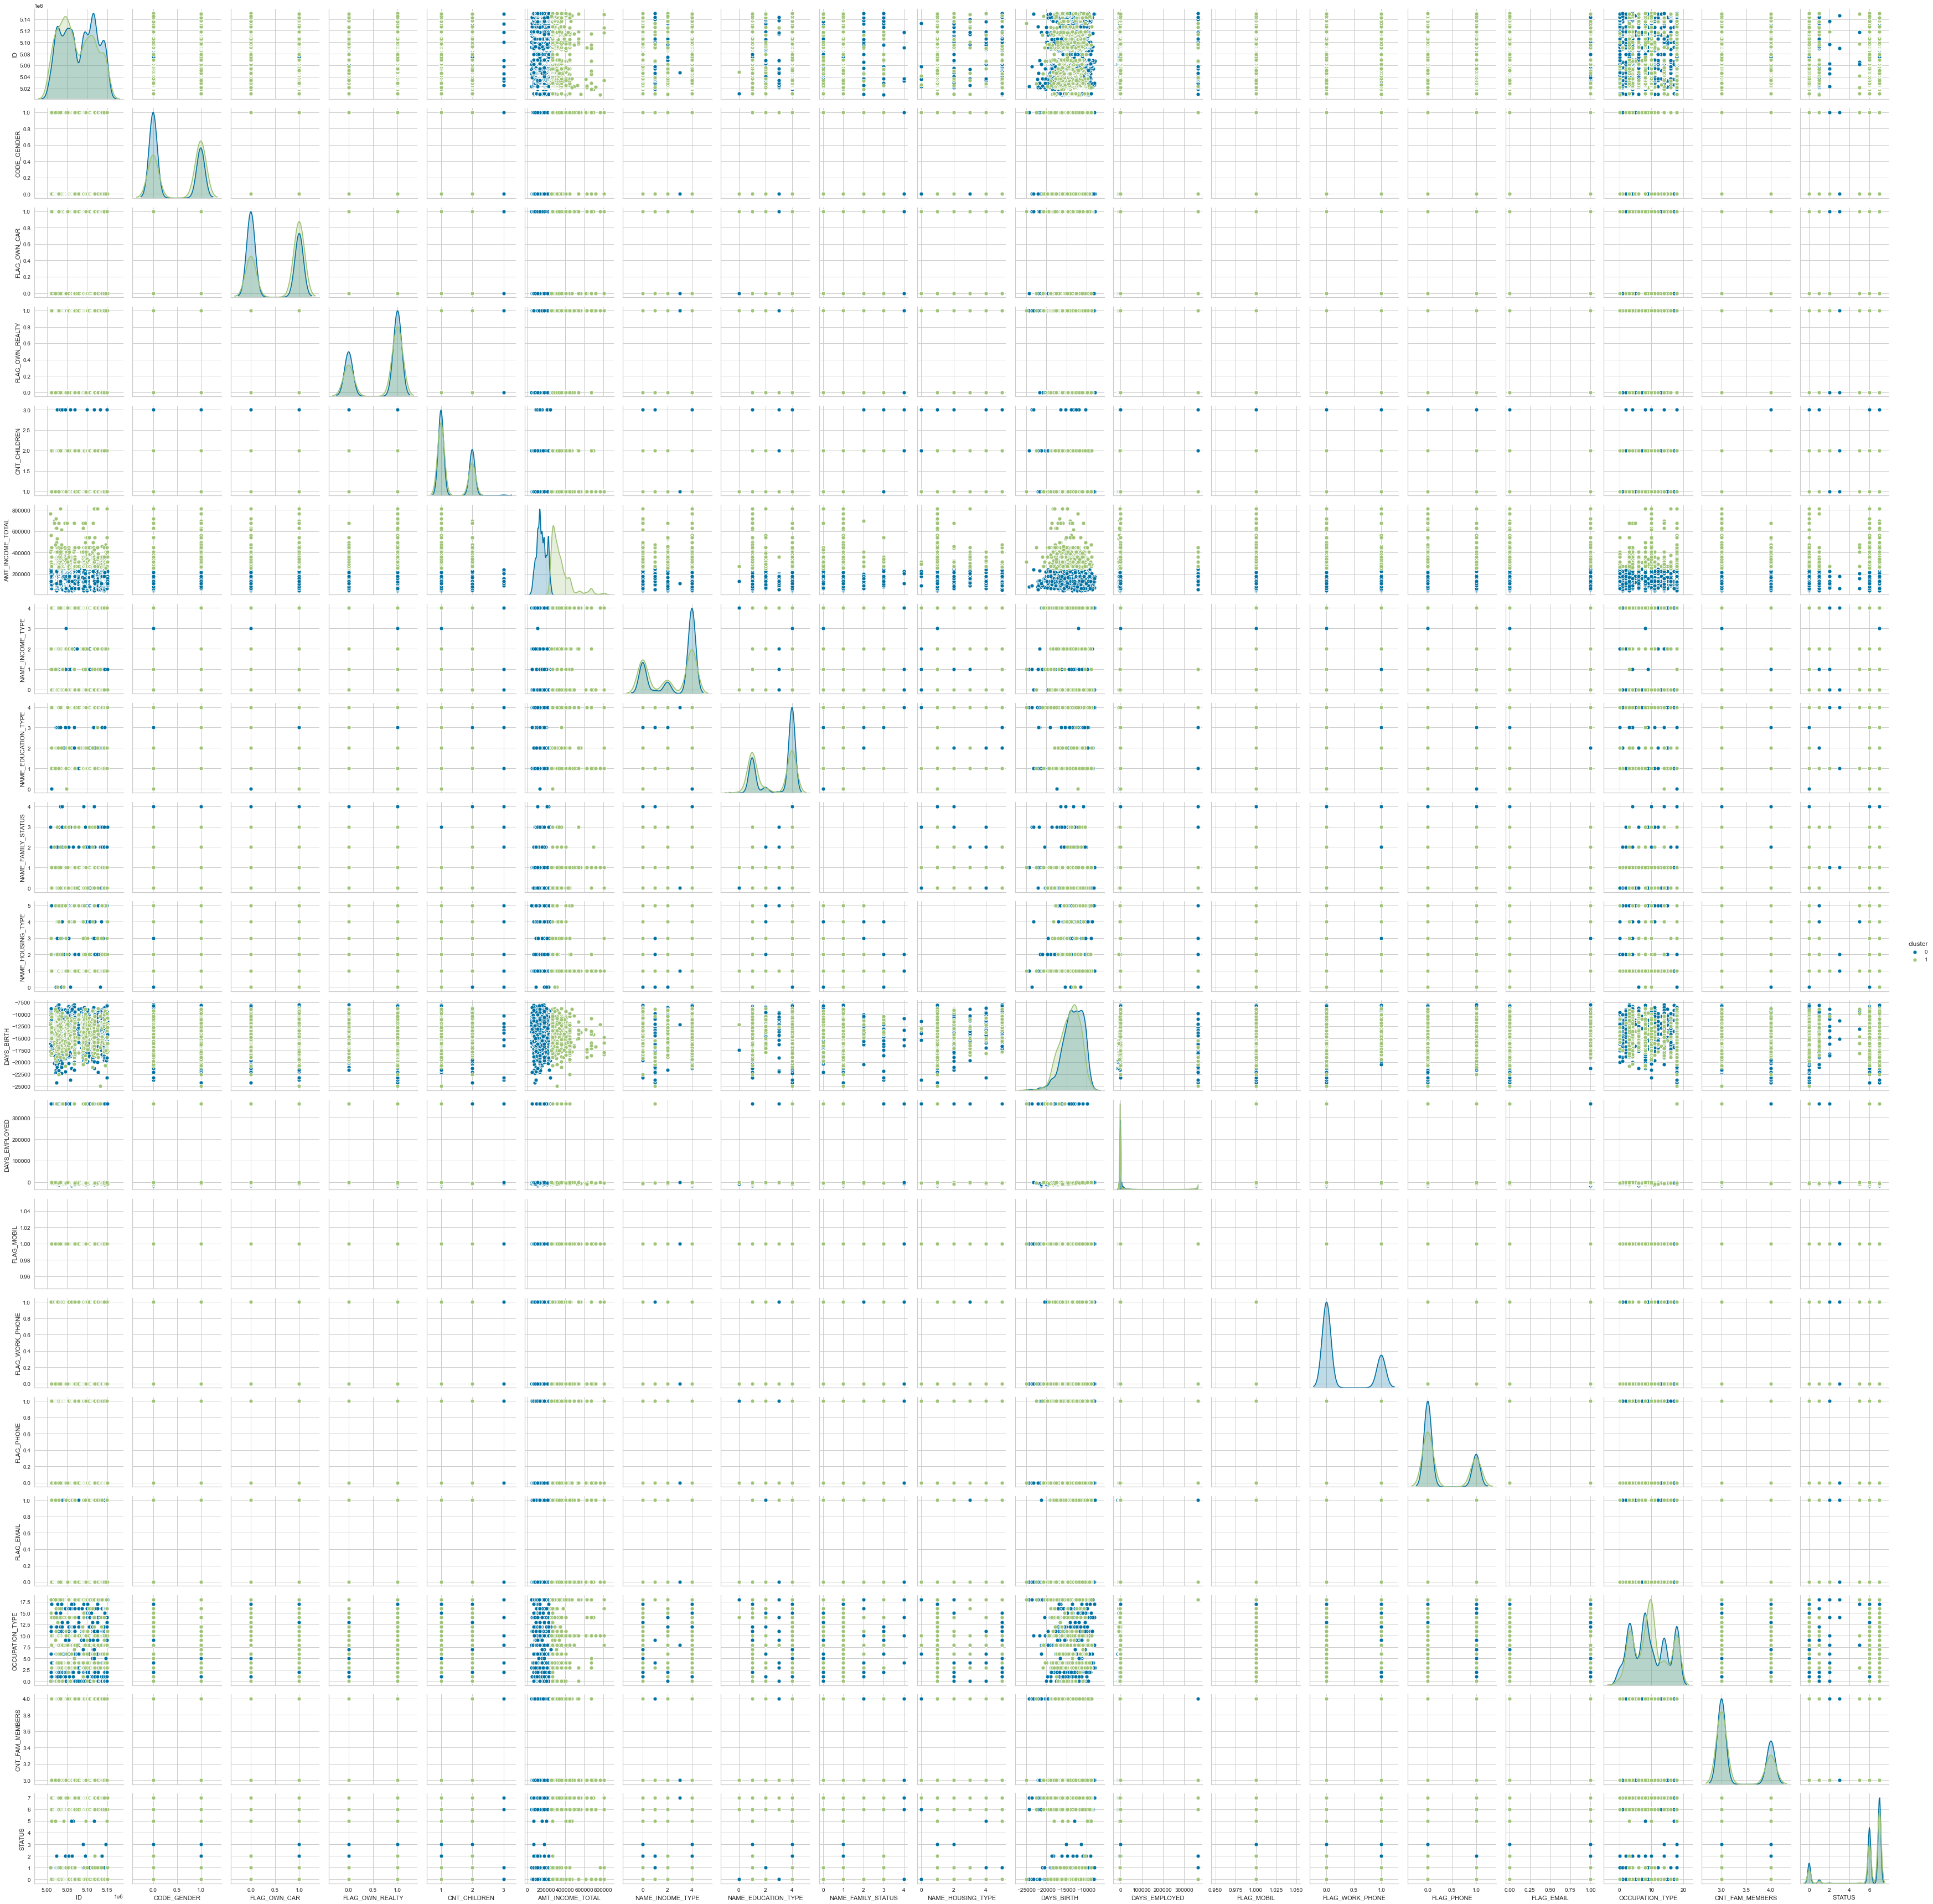

In [60]:
sns.pairplot(data=my_Cluster,hue='cluster')

### 3D Visualization:

In [61]:
import plotly.express as px

In [62]:
fig = px.scatter(my_Cluster, x = 'AMT_INCOME_TOTAL', y='OCCUPATION_TYPE')
fig.show()

In [63]:
px.scatter_3d(data_frame = my_Cluster , x ='cluster',y = 'OCCUPATION_TYPE',z= 'AMT_INCOME_TOTAL')

### To visualize the how much Features on each cluster:

Text(0, 0.5, 'features')

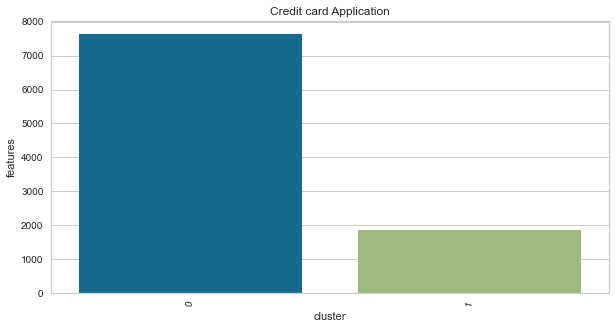

In [64]:
plt.figure(figsize=(10,5))
labels = my_Cluster['cluster'].value_counts().index
sns.countplot(data=my_Cluster, x='cluster')
plt.xticks(rotation=75)
plt.title('Credit card Application')
plt.xlabel('cluster')
plt.ylabel('features')

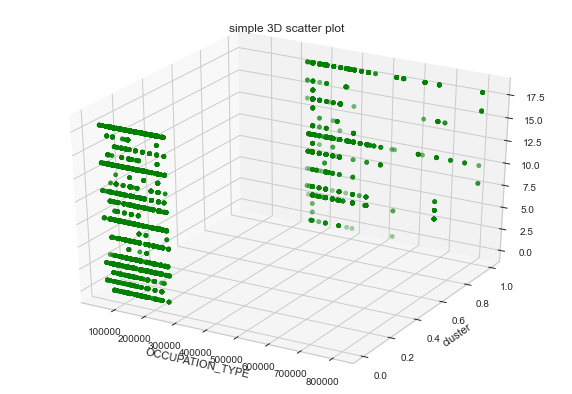

In [65]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

z = my_Cluster['OCCUPATION_TYPE']
x = my_Cluster['AMT_INCOME_TOTAL']
y = my_Cluster['cluster']
 
 # Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")
plt.xlabel('AMT_INCOME_TOTA')
plt.ylabel('cluster')
plt.xlabel('OCCUPATION_TYPE')
# show plot
plt.show()

## PIE CHART:

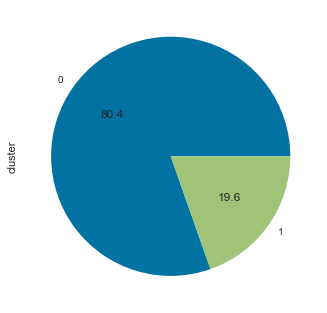

In [66]:
my_Cluster['cluster'].value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

In [67]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse

### Elbow method:

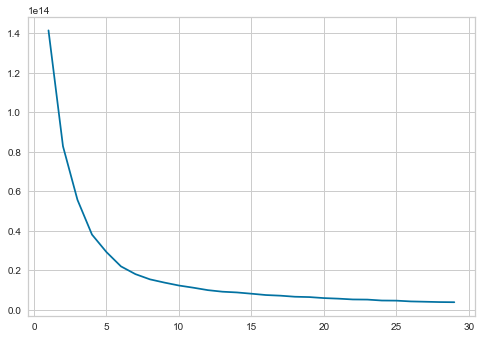

In [68]:
a=[]
for i in range(1,30): #max :20
    kmeans_em=KMeans(i)
    kmeans_em.fit(mydata)
    a.append(kmeans_em.inertia_) # 
plt.plot(range(1,30),a)

# Silhouette_score

In [69]:
from sklearn.metrics import silhouette_score 
for i in range(2,5):
    kmeans = KMeans(n_clusters = i, max_iter = 30)
    kmeans.fit(mydata)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(mydata,cluster_labels)
    print ("For _clusters={0},the silhouette score is {1}]". format(i, silhouette_avg))

For _clusters=2,the silhouette score is 0.5152288877893476]
For _clusters=3,the silhouette score is 0.5493212360977041]
For _clusters=4,the silhouette score is 0.44027184447742845]


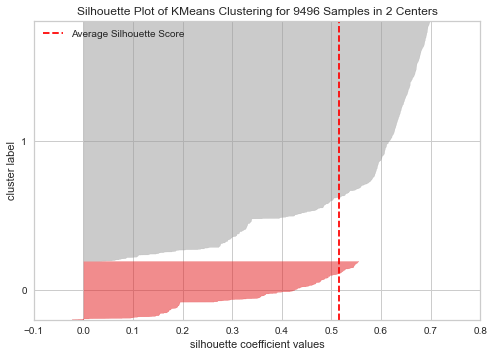

In [70]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

model =  KMeans(2)
visualizer = SilhouetteVisualizer(model, color = 'yellowbrick')
visualizer.fit(mydata)
visualizer.show()

In [71]:
df = my_Cluster.copy()
df.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008838            1             0                1             1   
1  5008839            1             0                1             1   
2  5008840            1             0                1             1   
3  5008841            1             0                1             1   
4  5008842            1             0                1             1   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          405000.0                 0                    1   
1          405000.0                 0                    1   
2          405000.0                 0                    1   
3          405000.0                 0                    1   
4          405000.0                 0                    1   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   1                  1      -11842          -2016   
1                   1                  1      -11842          -2016   
2                   1                  1      -11842          -2016   
3                   1                  1      -11842          -2016   
4                   1                  1      -11842          -2016   

   FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0           1                0           0           0               10   
1           1                0           0           0               10   
2           1                0           0           0               10   
3           1                0           0           0               10   
4           1                0           0           0               10   

   CNT_FAM_MEMBERS  STATUS  cluster  
0              3.0       7        1  
1              3.0       6        1  
2              3.0       6        1  
3              3.0       7        1  
4              3.0       0        1

In [72]:
df.shape

(9496, 20)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9496 entries, 0 to 9495
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9496 non-null   int64  
 1   CODE_GENDER          9496 non-null   int64  
 2   FLAG_OWN_CAR         9496 non-null   int64  
 3   FLAG_OWN_REALTY      9496 non-null   int64  
 4   CNT_CHILDREN         9496 non-null   int64  
 5   AMT_INCOME_TOTAL     9496 non-null   float64
 6   NAME_INCOME_TYPE     9496 non-null   int64  
 7   NAME_EDUCATION_TYPE  9496 non-null   int64  
 8   NAME_FAMILY_STATUS   9496 non-null   int64  
 9   NAME_HOUSING_TYPE    9496 non-null   int64  
 10  DAYS_BIRTH           9496 non-null   int64  
 11  DAYS_EMPLOYED        9496 non-null   int64  
 12  FLAG_MOBIL           9496 non-null   int64  
 13  FLAG_WORK_PHONE      9496 non-null   int64  
 14  FLAG_PHONE           9496 non-null   int64  
 15  FLAG_EMAIL           9496 non-null   i

In [74]:
df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
cluster                0
dtype: int64

In [75]:
#df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna(0)

In [76]:
df.drop('FLAG_MOBIL',axis = 1,inplace = True)

In [77]:
df.shape

(9496, 19)

In [78]:
df_corr = df.corr()
df_corr

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
ID                   1.000000     0.015163     -0.035838        -0.153897   
CODE_GENDER          0.015163     1.000000      0.321284        -0.045768   
FLAG_OWN_CAR        -0.035838     0.321284      1.000000         0.014120   
FLAG_OWN_REALTY     -0.153897    -0.045768      0.014120         1.000000   
CNT_CHILDREN         0.011231     0.006981      0.035072        -0.004354   
AMT_INCOME_TOTAL    -0.061171     0.257917      0.201429         0.028598   
NAME_INCOME_TYPE    -0.008064     0.041423     -0.041542        -0.030321   
NAME_EDUCATION_TYPE  0.009533     0.053862     -0.094515         0.005615   
NAME_FAMILY_STATUS   0.037691     0.040947      0.039716         0.010398   
NAME_HOUSING_TYPE    0.016703     0.021469     -0.003269        -0.220412   
DAYS_BIRTH           0.032189    -0.053889     -0.049873        -0.102026   
DAYS_EMPLOYED       -0.015908    -0.005878      0.000299        -0.006783   
FLAG_WORK_PHONE      0.117498     0.022488     -0.038051        -0.195077   
FLAG_PHONE           0.037808    -0.007447     -0.024979        -0.038960   
FLAG_EMAIL          -0.047885    -0.070093     -0.006363         0.070195   
OCCUPATION_TYPE      0.014912    -0.056975     -0.024722        -0.011775   
CNT_FAM_MEMBERS      0.000139     0.027465      0.045547        -0.007585   
STATUS              -0.003470     0.006601      0.003374        -0.013343   
cluster             -0.060265     0.162293      0.176160         0.027800   

                     CNT_CHILDREN  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
ID                       0.011231         -0.061171         -0.008064   
CODE_GENDER              0.006981          0.257917          0.041423   
FLAG_OWN_CAR             0.035072          0.201429         -0.041542   
FLAG_OWN_REALTY         -0.004354          0.028598         -0.030321   
CNT_CHILDREN             1.000000         -0.031060          0.033510   
AMT_INCOME_TOTAL        -0.031060          1.000000         -0.150192   
NAME_INCOME_TYPE         0.033510         -0.150192          1.000000   
NAME_EDUCATION_TYPE     -0.020341         -0.210327          0.127626   
NAME_FAMILY_STATUS       0.215785          0.032122          0.011221   
NAME_HOUSING_TYPE       -0.023037         -0.020242          0.020496   
DAYS_BIRTH               0.014791         -0.132882          0.054681   
DAYS_EMPLOYED           -0.022605         -0.044852         -0.146875   
FLAG_WORK_PHONE          0.054277         -0.078722          0.121632   
FLAG_PHONE               0.011824          0.056545          0.011850   
FLAG_EMAIL              -0.047300          0.064418         -0.047948   
OCCUPATION_TYPE         -0.023940          0.029623         -0.049299   
CNT_FAM_MEMBERS          0.953941         -0.034290          0.030065   
STATUS                  -0.015491          0.025616          0.003120   
cluster                 -0.041048          0.779185         -0.135294   

                     NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
ID                              0.009533            0.037691   
CODE_GENDER                     0.053862            0.040947   
FLAG_OWN_CAR                   -0.094515            0.039716   
FLAG_OWN_REALTY                 0.005615            0.010398   
CNT_CHILDREN                   -0.020341            0.215785   
AMT_INCOME_TOTAL               -0.210327            0.032122   
NAME_INCOME_TYPE                0.127626            0.011221   
NAME_EDUCATION_TYPE             1.000000           -0.037161   
NAME_FAMILY_STATUS             -0.037161            1.000000   
NAME_HOUSING_TYPE              -0.015554            0.001895   
DAYS_BIRTH                     -0.101882           -0.030508   
DAYS_EMPLOYED                   0.058181            0.031661   
FLAG_WORK_PHONE                 0.000349           -0.006414   
FLAG_PHONE                     -0.028782            0.010155   
FLAG_EMAIL                     -0.077752           -0.047488   
O

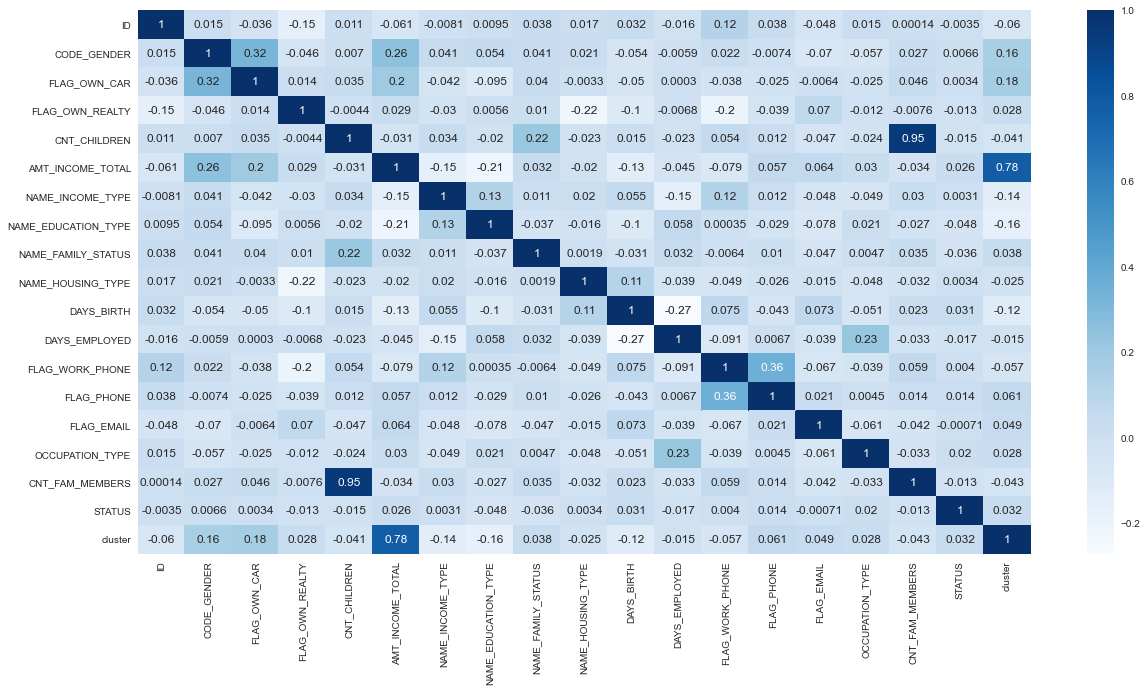

In [79]:
plt.figure(figsize = (20,10))
sns.heatmap(df_corr,annot = True,cmap = 'Blues')

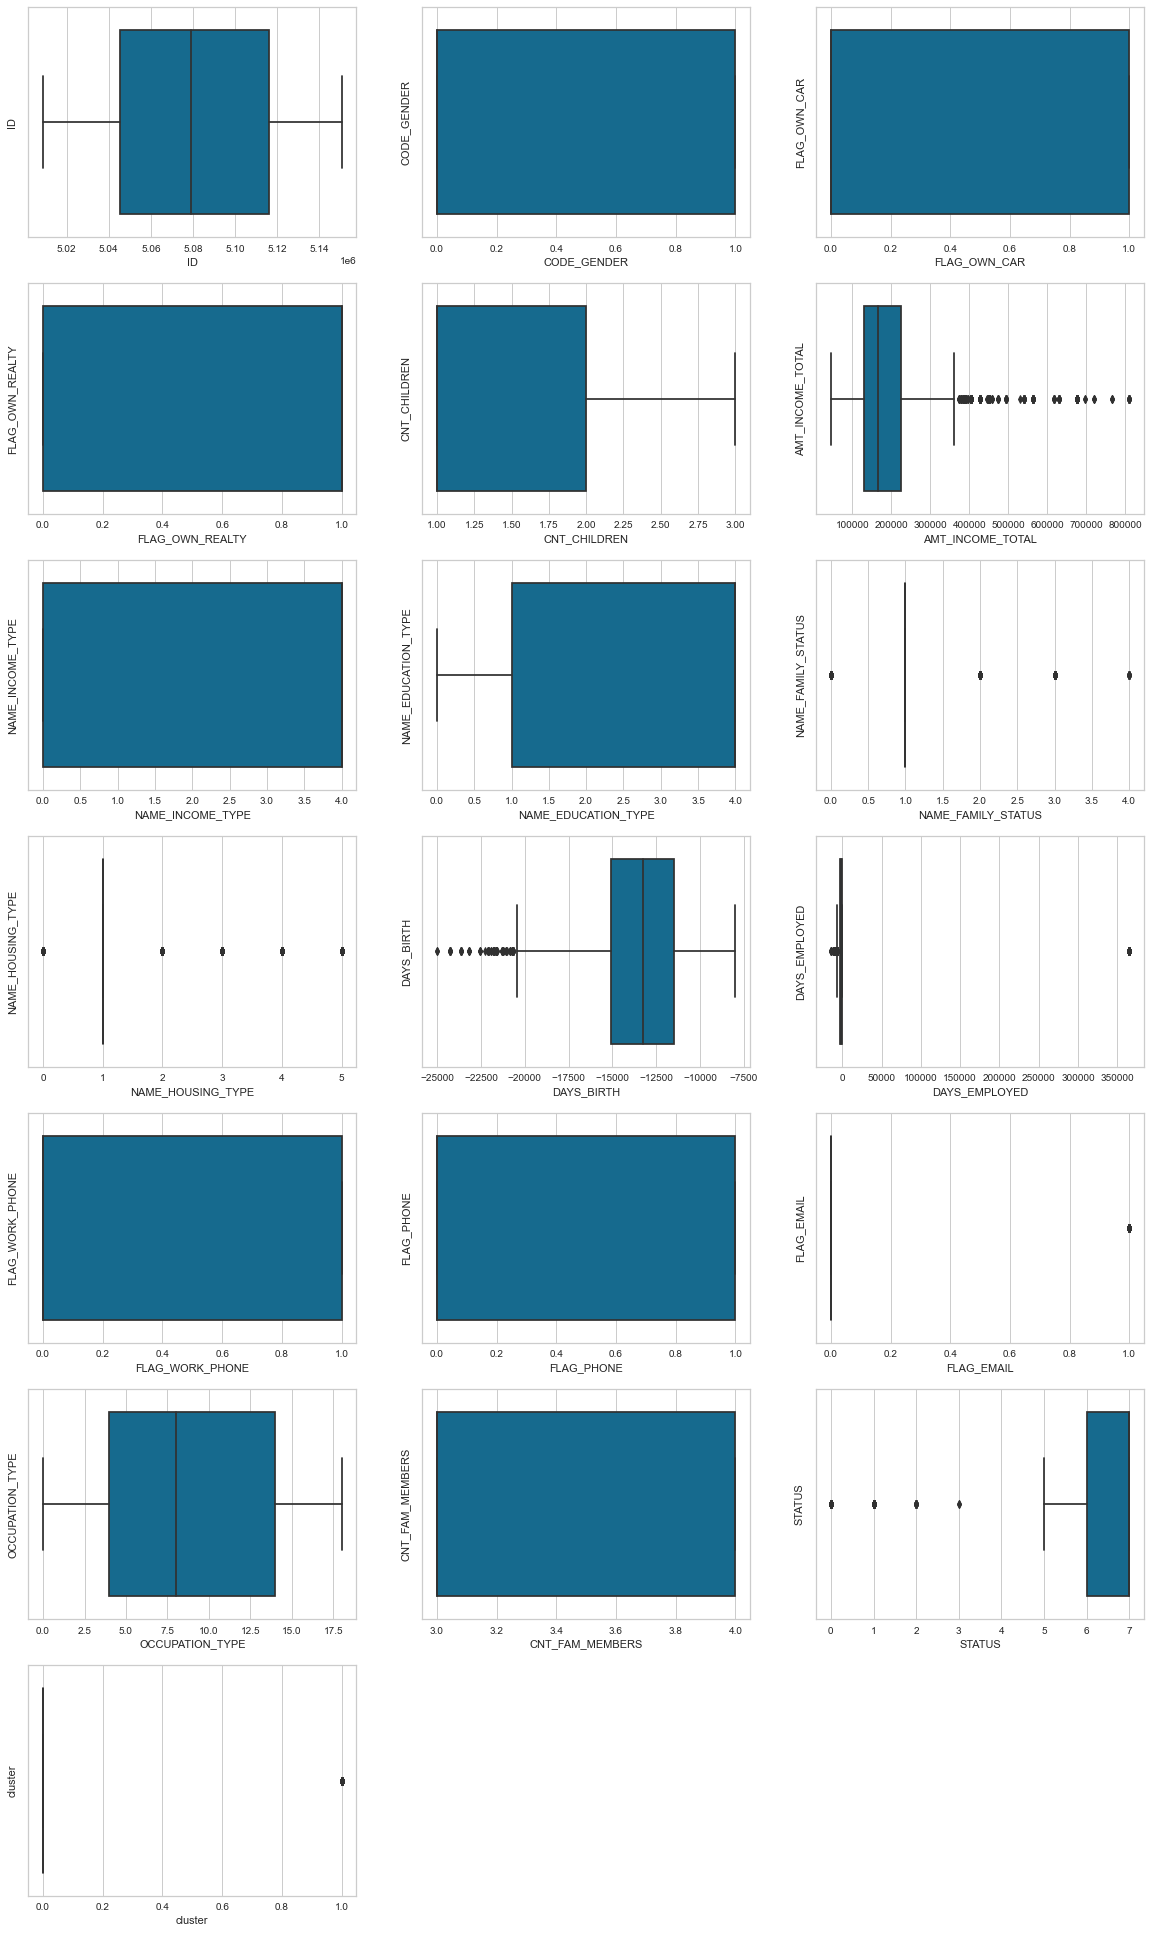

In [80]:
plt.figure(figsize=(20,50))
for i,col in enumerate(df,1):
    plt.subplot(10,3,i)
    sns.boxplot(df[col])
    plt.ylabel(col)
plt.show()

In [81]:
df1 = df[pd.notnull(df['ID'])]
df1

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0     5008838            1             0                1             1   
1     5008839            1             0                1             1   
2     5008840            1             0                1             1   
3     5008841            1             0                1             1   
4     5008842            1             0                1             1   
...       ...          ...           ...              ...           ...   
9491  5142964            1             0                0             1   
9492  5142972            1             0                0             1   
9493  5143342            1             0                0             1   
9494  5145846            0             0                1             1   
9495  5149190            1             1                0             1   

      AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0             405000.0                 0                    1   
1             405000.0                 0                    1   
2             405000.0                 0                    1   
3             405000.0                 0                    1   
4             405000.0                 0                    1   
...                ...               ...                  ...   
9491          180000.0                 4                    4   
9492          180000.0                 4                    4   
9493          216000.0                 4                    4   
9494          256500.0                 2                    1   
9495          450000.0                 4                    1   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                      1                  1      -11842          -2016   
1                      1                  1      -11842          -2016   
2                      1                  1      -11842          -2016   
3                      1                  1      -11842          -2016   
4                      1                  1      -11842          -2016   
...                  ...                ...         ...            ...   
9491                   1                  1      -10656           -926   
9492                   3                  1      -10656           -926   
9493                   1                  2      -12946          -2418   
9494                   1                  1      -17594          -1315   
9495                   1                  1       -9847           -502   

      FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  \
0                   0           0           0               10   
1                   0           0           0               10   
2                   0           0           0               10   
3                   0           0           0               10   
4                   0           0           0               10   
...               ...         ...         ...              ...   
9491                1           1           0                8   
9492                1           1           0                8   
9493                0           0           1                8   
9494                0           1           0               10   
9495                0           1           1                3   

      CNT_FAM_MEMBERS  STATUS  cluster  
0                 3.0       7        1  
1                 3.0       6        1  
2                 3.0       6        1  
3                 3.0       7        1  
4                 3.0       0        1  
...               ...     ...      ...  
9491              3.0       7        0  
9492              3.0       6        0  
9493              3.0       6        0  
9494              3.0       6        1  
9495              3.0       5        1  

[9496 rows x 19 columns]

In [82]:
df1.shape

(9496, 19)

In [83]:
cat_mydata= (['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'])
categorical = df1[cat_mydata]
categorical

CODE_GENDER  FLAG_OWN_REALTY  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0               1                1                 0                    1   
1               1                1                 0                    1   
2               1                1                 0                    1   
3               1                1                 0                    1   
4               1                1                 0                    1   
...           ...              ...               ...                  ...   
9491            1                0                 4                    4   
9492            1                0                 4                    4   
9493            1                0                 4                    4   
9494            0                1                 2                    1   
9495            1                0                 4                    1   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  
0                      1                  1               10  
1                      1                  1               10  
2                      1                  1               10  
3                      1                  1               10  
4                      1                  1               10  
...                  ...                ...              ...  
9491                   1                  1                8  
9492                   3                  1                8  
9493                   1                  2                8  
9494                   1                  1               10  
9495                   1                  1                3  

[9496 rows x 7 columns]

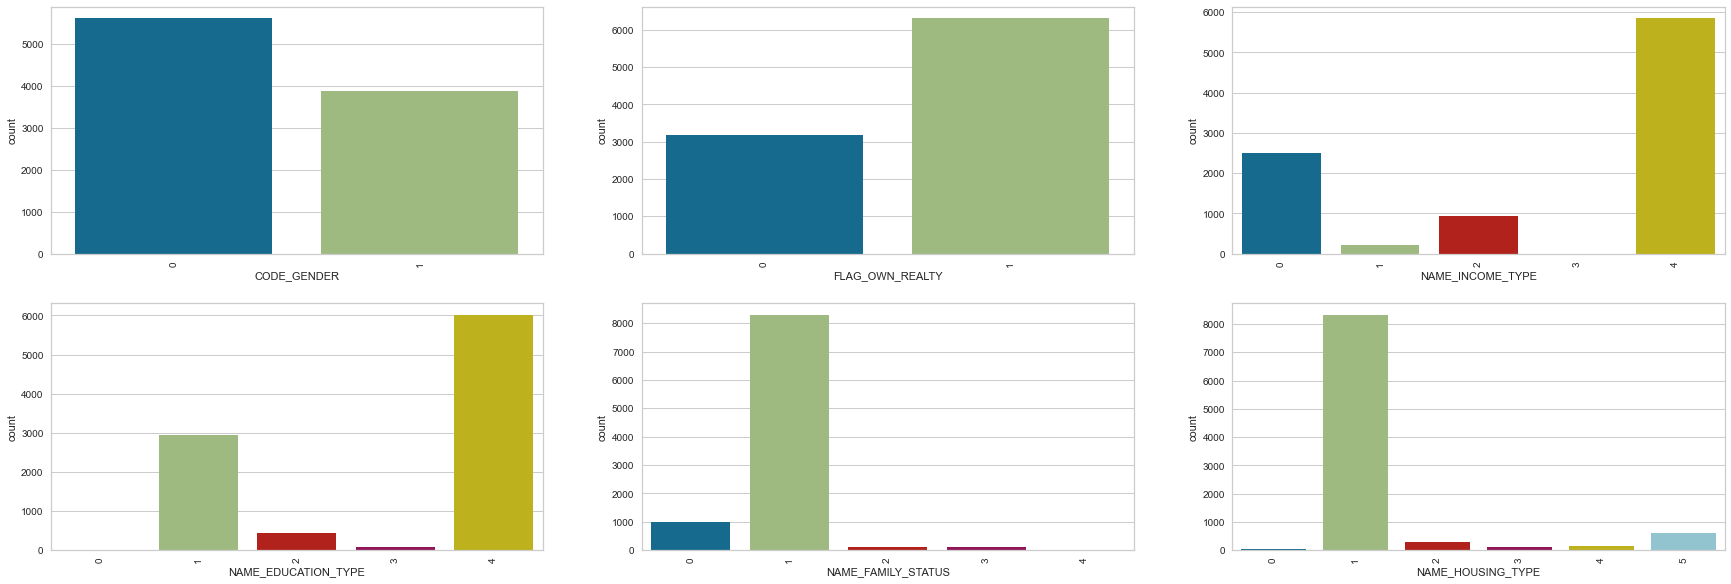

In [84]:
ig, ax = plt.subplots(2, 3, figsize=(30, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(mydata[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

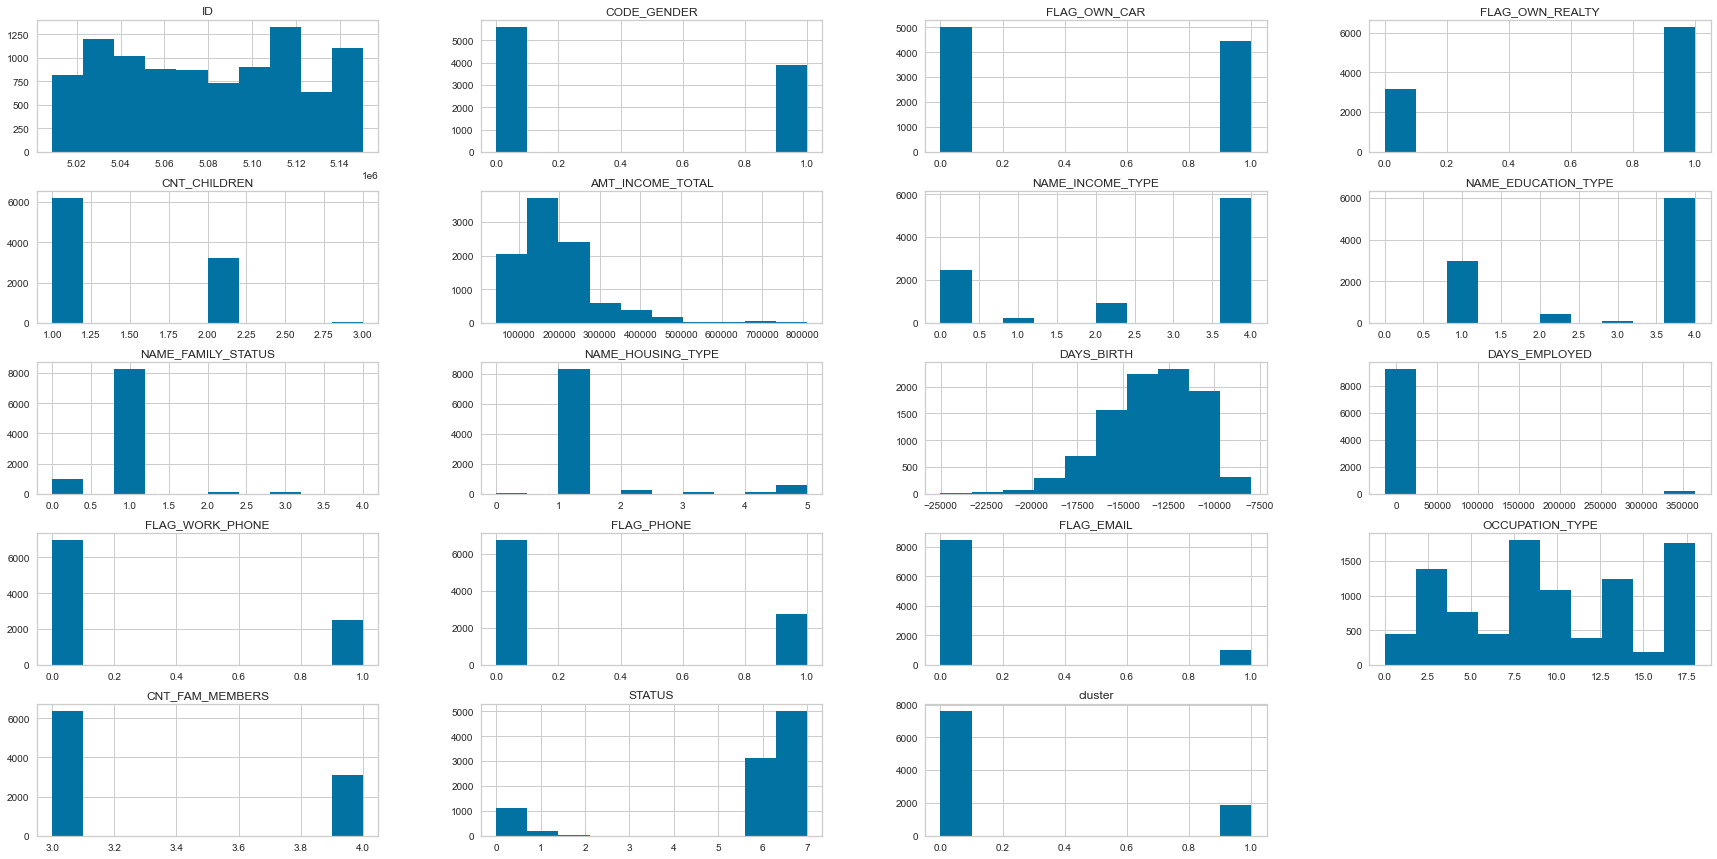

In [85]:
histograms = df1.hist(figsize=(30,15))

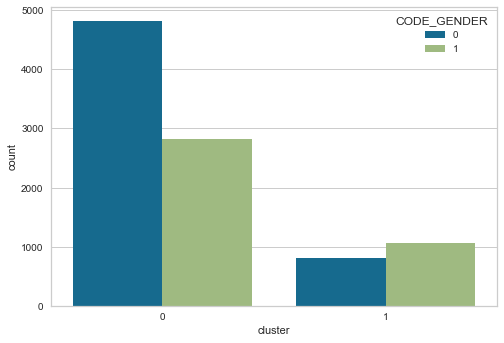

In [86]:
sns.countplot(x="cluster",data=df1,hue="CODE_GENDER")

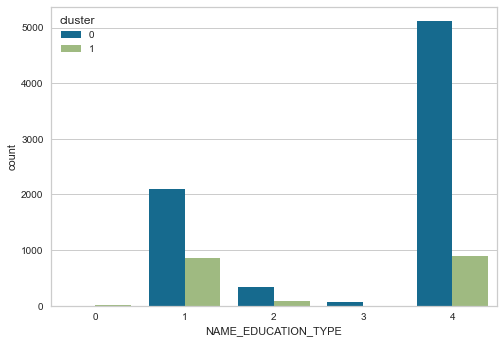

In [87]:
sns.countplot(x='NAME_EDUCATION_TYPE',hue='cluster',data=df1)

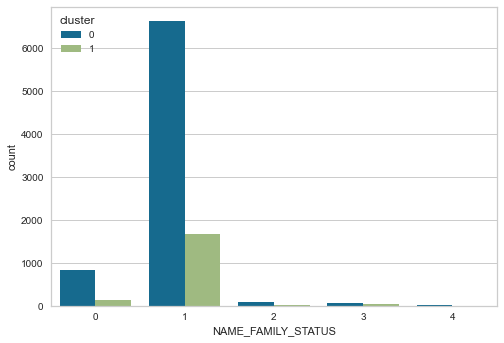

In [88]:
sns.countplot(x='NAME_FAMILY_STATUS',hue='cluster',data=df1)

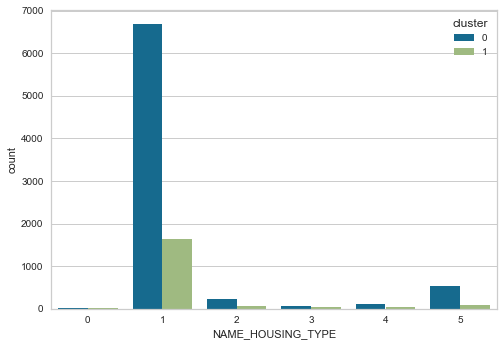

In [89]:
sns.countplot(x='NAME_HOUSING_TYPE',hue='cluster',data=df1)

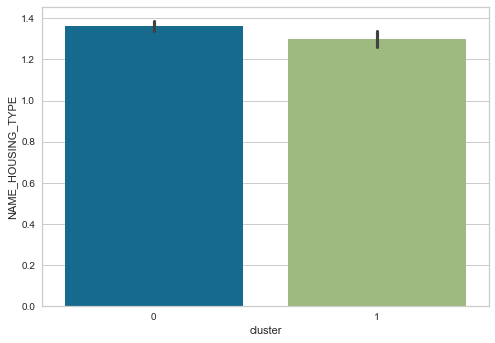

In [90]:
sns.barplot(x="cluster",y='NAME_HOUSING_TYPE',data=df1);

In [91]:
df1.shape

(9496, 19)

In [92]:
df1.drop('DAYS_EMPLOYED',axis = 1,inplace = True)

In [93]:
x_ind = df1.iloc[:,:-1]
x_ind.shape

(9496, 17)

In [94]:
y_dep = df1.iloc[:,-1]


In [95]:
#x_ind.equals(y_dep)

#### Train and Test split:

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

#### Scaling : MinMaxScaler

In [97]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scale.fit_transform(x_test), columns=x_test.columns)

### Distribution of observation in each cluster
Python counter:
        Python Counter is a container that will hold the count of each of the elements present in the container. The counter is a sub-class available inside the dictionary class. The counter is a sub-class available inside the dictionary class. Using the Python Counter tool, you can count the key-value pairs in an object, also called a hash table object


In [98]:
from collections import Counter
Counter(y_train)

Counter({0: 6101, 1: 1495})

### Oversampling:

In [99]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_balanced, y_balanced = oversample.fit_resample(x_scaled, y_train)
x_test_balanced, y_test_balanced = oversample.fit_resample(x_test_scaled, y_test)


In [100]:
x_balanced.shape

(12202, 17)

In [101]:
y_balanced.shape

(12202,)

In [102]:
x_test_balanced.shape

(3066, 17)

In [103]:
x_test.shape

(1900, 17)

# Model Building :

### Logistic Regression:

In [104]:
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression()

In [105]:
model1.fit(x_balanced,y_balanced)

LogisticRegression()

In [106]:
y_pred1=model1.predict(x_test_balanced)
y_pred1

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [107]:
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix,roc_auc_score,recall_score

In [108]:
#Confusion matrix:
print(confusion_matrix(y_test_balanced,y_pred1))  # using predicted and test values

[[1450   83]
 [   0 1533]]


In [109]:
acc_LR =accuracy_score(y_test_balanced,y_pred1)
acc_LR

0.9729288975864319

In [110]:
roc_auc_score_LR = roc_auc_score(y_test_balanced,y_pred1)
roc_auc_score_LR 

0.9729288975864319

In [111]:
F1score_LR =  f1_score(y_test_balanced,y_pred1)
recall_LR = recall_score(y_test_balanced,y_pred1)

In [112]:
from sklearn.metrics import classification_report
c_report = classification_report(y_test_balanced,y_pred1)
print(c_report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1533
           1       0.95      1.00      0.97      1533

    accuracy                           0.97      3066
   macro avg       0.97      0.97      0.97      3066
weighted avg       0.97      0.97      0.97      3066



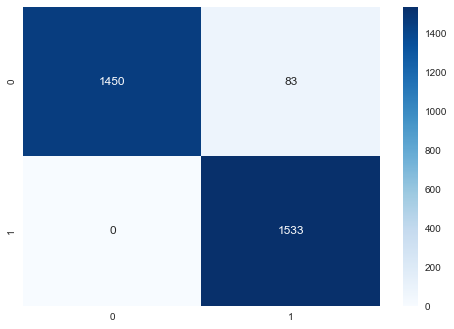

In [113]:
sns.heatmap(confusion_matrix(y_test_balanced,y_pred1), annot = True ,cmap = "Blues",fmt = 'd')

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

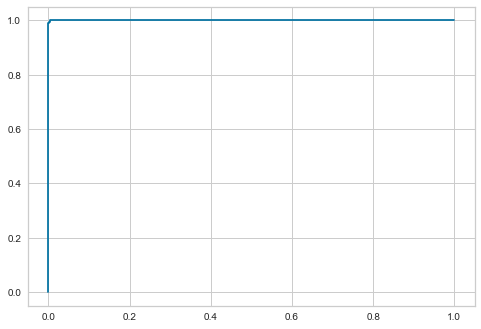

In [115]:
logis_roc_curve= roc_auc_score(y_test_balanced,y_pred1)

fpr,tpr,thresholds = roc_curve(y_test_balanced,model1.predict_proba(x_test_balanced)[:,1])
plt.plot(fpr,tpr,logis_roc_curve)

In [116]:
roc_t = LogisticRegression(class_weight = "Balanced")
roc_t.fit(x_balanced,y_balanced)
THRESHOLD = 0.9

In [117]:
y_pred_roc = np.where(roc_t.predict_proba(x_test_balanced)[:,1]>THRESHOLD,1,0)

In [118]:
accuracy_score(y_test_balanced,y_pred_roc)

0.9292237442922374

In [119]:
from sklearn.metrics import classification_report
c_report = classification_report(y_test_balanced,y_pred_roc)
print(c_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1533
           1       1.00      0.86      0.92      1533

    accuracy                           0.93      3066
   macro avg       0.94      0.93      0.93      3066
weighted avg       0.94      0.93      0.93      3066



In [120]:
df_comp=pd.DataFrame({'Actual':y_test_balanced, 'Predicted':y_pred1})
df_comp

Actual  Predicted
0          0          0
1          1          1
2          0          0
3          0          0
4          0          0
...      ...        ...
3061       1          1
3062       1          1
3063       1          1
3064       1          1
3065       1          1

[3066 rows x 2 columns]

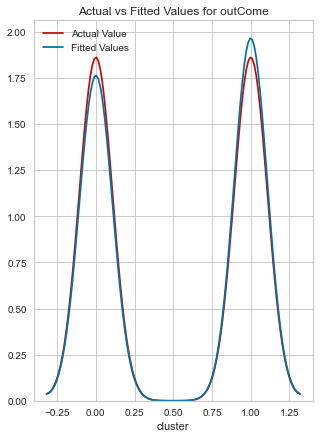

In [121]:

plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test_balanced, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred1, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for outCome')


plt.show()
plt.close()

### KNN - K nearest neighbors:

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
df1.shape

(9496, 18)

In [124]:
np.sqrt(9496)

97.44742172063866

In [125]:
KNN=KNeighborsClassifier(n_neighbors=95,p=2,metric='euclidean')


In [126]:
y_dep.value_counts()

0    7634
1    1862
Name: cluster, dtype: int64

In [127]:
model2=KNN.fit(x_balanced,y_balanced)

In [128]:
y_pred2=KNN.predict(x_test_balanced)
y_pred2

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [129]:
confusion_matrix(y_test_balanced,y_pred2)

array([[1064,  469],
       [ 232, 1301]])

In [130]:
accuracy_score(y_test_balanced,y_pred2)

0.7713633398564905

In [131]:
F1score_KNN =  f1_score(y_test_balanced,y_pred2)
recall_KNN= recall_score(y_test_balanced,y_pred2)

In [132]:
roc_auc_score_KNN = roc_auc_score(y_test_balanced,y_pred2)
roc_auc_score_KNN

0.7713633398564905

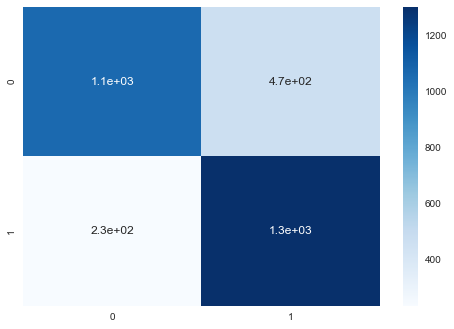

In [133]:
sns.heatmap(confusion_matrix(y_test_balanced,y_pred2), annot = True ,cmap = "Blues")

In [134]:
c_report = classification_report(y_test_balanced,y_pred2)
print(c_report)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1533
           1       0.74      0.85      0.79      1533

    accuracy                           0.77      3066
   macro avg       0.78      0.77      0.77      3066
weighted avg       0.78      0.77      0.77      3066



# Error rate method:

In [135]:
error_rate=[]

for i in range(1,40):
    knn_new=KNeighborsClassifier(n_neighbors=i)
    knn_new.fit(x_balanced,y_balanced)
    y_pred_er=knn_new.predict(x_test_balanced)
    error_rate.append(np.mean(y_pred_er !=y_test_balanced))

Text(0, 0.5, 'Error_rate')

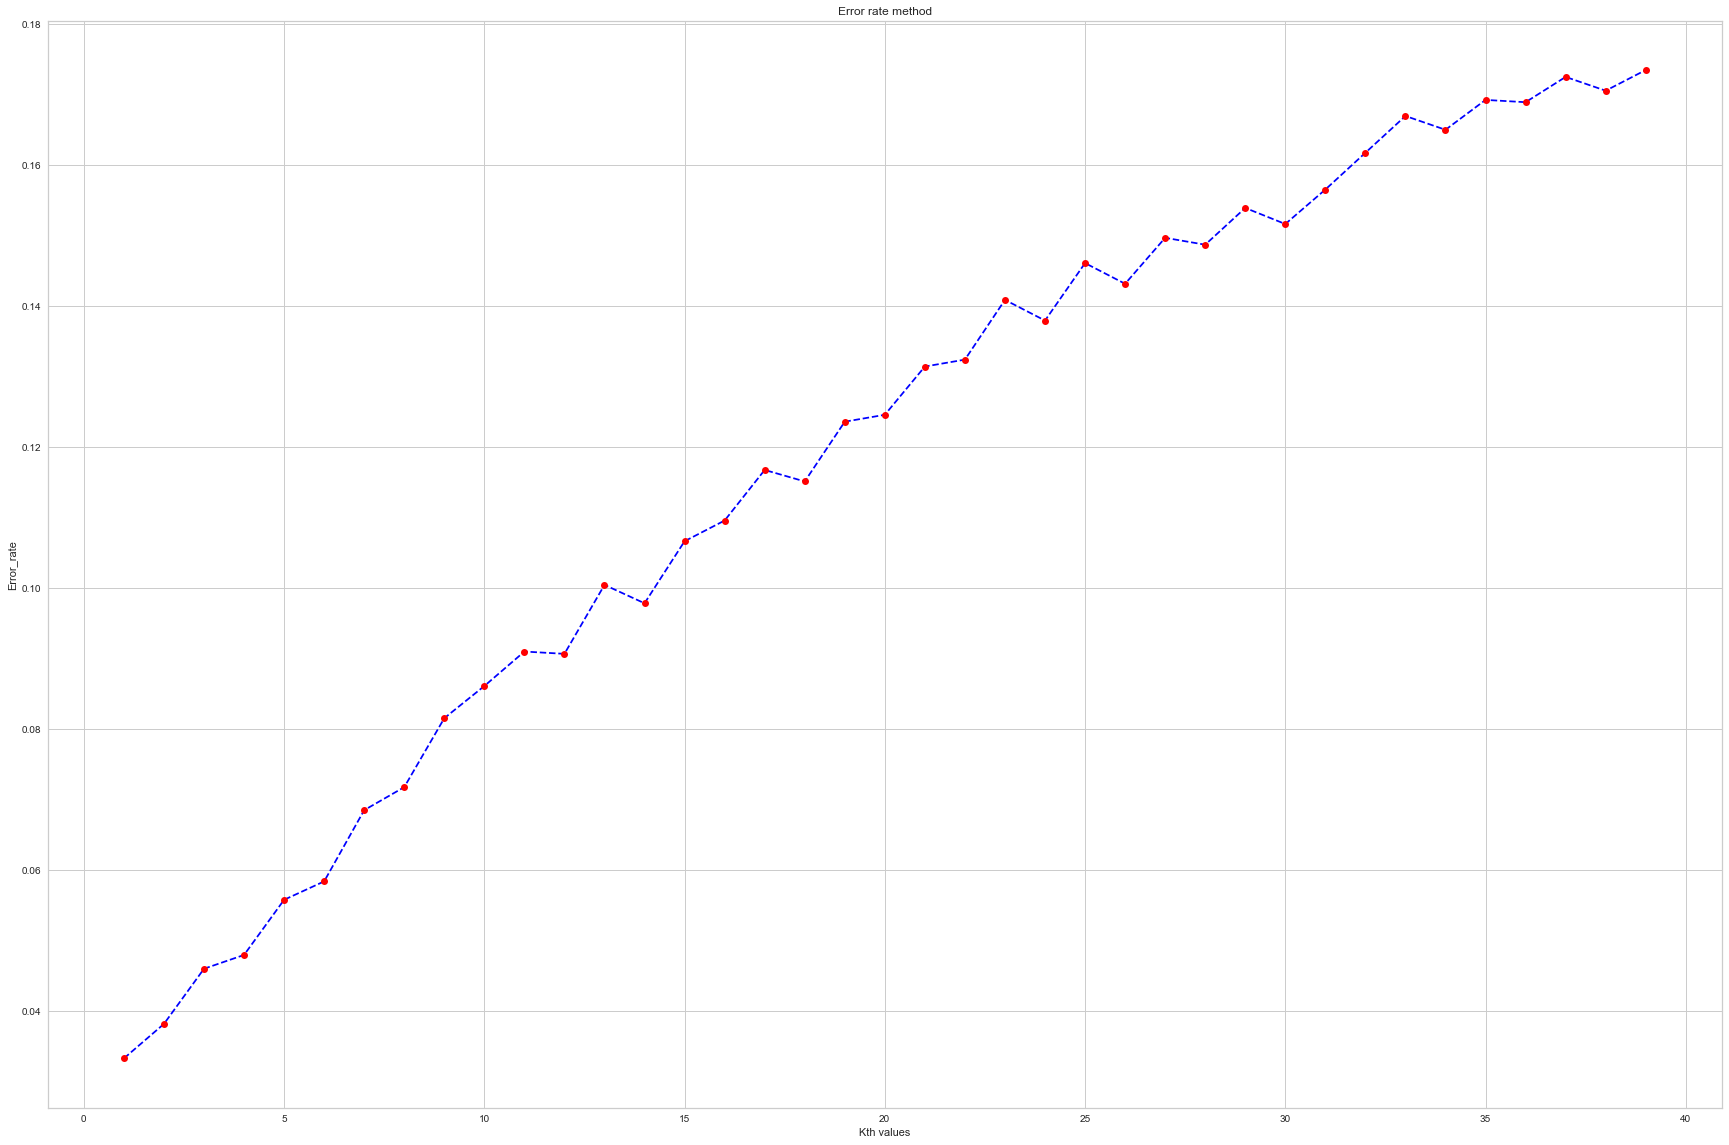

In [136]:
plt.figure(figsize=(30,20))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',
        marker='o',markerfacecolor='red')
plt.title("Error rate method")
plt.xlabel("Kth values")
plt.ylabel("Error_rate")

In [137]:
KNN1=KNeighborsClassifier(n_neighbors=2,p=2,metric='euclidean')

In [138]:
KNN1=KNN1.fit(x_balanced,y_balanced)

In [139]:
y_pred3 = KNN1.predict(x_test_balanced)
accuracy_score(y_test_balanced, y_pred3)

0.961839530332681

In [140]:
y_train_pred3 = KNN1.predict(x_balanced)
acc_KNN = accuracy_score(y_balanced, y_train_pred3)
acc_KNN

0.9986067857728241

In [141]:
confusion_matrix(y_test_balanced,y_pred3),

(array([[1498,   35],
        [  82, 1451]]),)

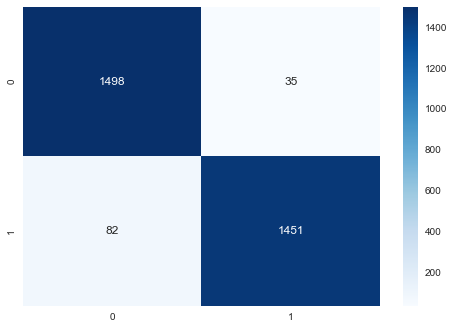

In [142]:
sns.heatmap(confusion_matrix(y_test_balanced,y_pred3), annot = True ,cmap = "Blues",fmt = 'd')

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
K_values= range (2,40)
param_grid = {"n_neighbors": K_values,"p": [2],"weights": ['uniform','distance']}

In [145]:
KNN_grid = KNeighborsClassifier()
KNN_grid_model = GridSearchCV(KNN_grid, param_grid, cv=5, scoring='accuracy')
KNN_grid_model.fit(x_balanced,y_balanced)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40), 'p': [2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [146]:
print('Best parameters of GridsearchCV for KNN :', KNN_grid_model.best_params_)
print("----------------------------------------------------------------------------------------------------")
print('Best estimators of GridsearchCV for KNN :', KNN_grid_model.best_estimator_)

Best parameters of GridsearchCV for KNN : {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
----------------------------------------------------------------------------------------------------
Best estimators of GridsearchCV for KNN : KNeighborsClassifier(n_neighbors=2, weights='distance')


accuracy_score: 0.961839530332681
----------------------------------------------------------------------------------------------------
[[1498   35]
 [  82 1451]] :confusion_matrix
----------------------------------------------------------------------------------------------------
0.9612454455117588 :Fiscore
------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1533
           1       0.98      0.95      0.96      1533

    accuracy                           0.96      3066
   macro avg       0.96      0.96      0.96      3066
weighted avg       0.96      0.96      0.96      3066



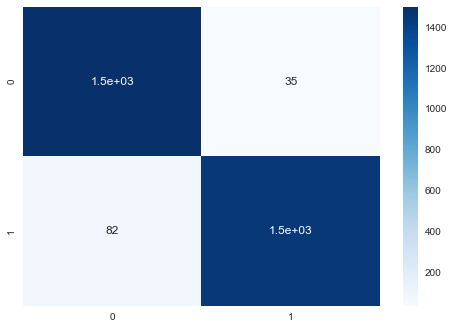

In [147]:
#Build a model with n= 2
KNN2=KNeighborsClassifier(n_neighbors=2,p=2,metric='euclidean')
KNN2=KNN2.fit(x_balanced,y_balanced)
y_pred4 = KNN2.predict(x_test_balanced)
print("accuracy_score:",accuracy_score(y_test_balanced, y_pred4))
print("----------------------------------------------------------------------------------------------------")
print(confusion_matrix(y_test_balanced,y_pred4),":confusion_matrix")
print("----------------------------------------------------------------------------------------------------")
print(f1_score(y_test_balanced,y_pred4),":Fiscore")
print("------------------------------------------------------------------------------------------------------")
sns.heatmap(confusion_matrix(y_test_balanced,y_pred4), annot = True ,cmap = "Blues")
c_report = classification_report(y_test_balanced,y_pred4)
print(c_report)

In [148]:
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve

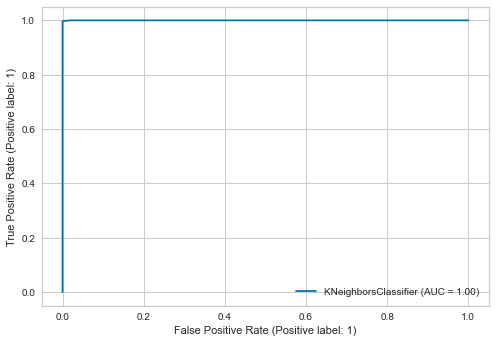

In [149]:
plot_roc_curve(KNN2,x_balanced,y_balanced);

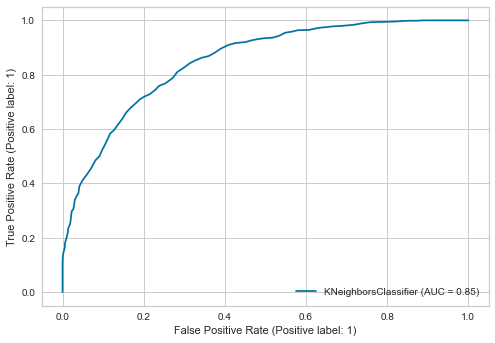

In [150]:
plot_roc_curve(model2,x_balanced,y_balanced);

# SVM:

In [151]:
from sklearn.svm import SVC

In [152]:
model=SVC(kernel='linear')
SVM_model=model.fit(x_balanced,y_balanced)

In [153]:
y_pred5=SVM_model.predict(x_test_balanced)
confusion_mat = confusion_matrix(y_test_balanced,y_pred5)
confusion_mat 

array([[1490,   43],
       [   0, 1533]])

In [154]:
acc_SVM = accuracy_score(y_test_balanced, y_pred5)
acc_SVM

0.9859752120026093

In [155]:
roc_auc_score_SVM = roc_auc_score(y_test_balanced,y_pred5)
roc_auc_score_SVM

0.9859752120026093

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1533
           1       0.97      1.00      0.99      1533

    accuracy                           0.99      3066
   macro avg       0.99      0.99      0.99      3066
weighted avg       0.99      0.99      0.99      3066



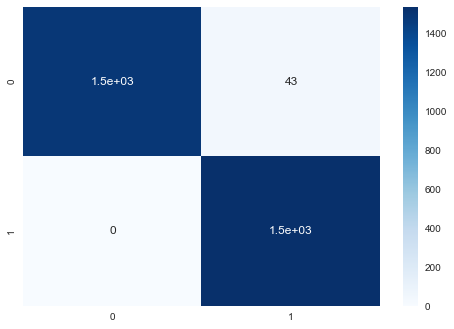

In [156]:
F1score_SVM =  f1_score(y_test_balanced,y_pred5)
recall_SVM= recall_score(y_test_balanced,y_pred5)

sns.heatmap(confusion_mat, annot = True ,cmap = "Blues")
c_report = classification_report(y_test_balanced,y_pred5)
print(c_report)

In [157]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid1 = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
 
grid1 = GridSearchCV(SVC(), param_grid1, refit = True, verbose = 3)
 
# fitting the model for grid search
grid1.fit(x_balanced, y_balanced)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.935 total time=   4.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   4.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   5.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.941 total time=   4.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   5.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.930 total time=   4.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.933 total time=   4.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.936 total time=   4.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.938 total time=   5.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   4.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.750 total time=   6.4s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [158]:
print('Best parameters of GridsearchCV for SVM :',grid1.best_params_)
print("----------------------------------------------------------------------------------------------------")
print('Best estimators of GridsearchCV for SVM :', grid1.best_estimator_)

Best parameters of GridsearchCV for SVM : {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
Best estimators of GridsearchCV for SVM : SVC(C=1000, gamma=0.1)


In [159]:
y_pred6=grid1.predict(x_test_balanced)
confusion_mat = confusion_matrix(y_test_balanced,y_pred6)
confusion_mat 

array([[1520,   13],
       [   0, 1533]])

In [160]:
F1score_SVMCV =  f1_score(y_test_balanced,y_pred6)
recall_SVMCV = recall_score(y_test_balanced,y_pred6)

accuracy_score: 0.9957599478147423
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1533
           1       0.99      1.00      1.00      1533

    accuracy                           1.00      3066
   macro avg       1.00      1.00      1.00      3066
weighted avg       1.00      1.00      1.00      3066



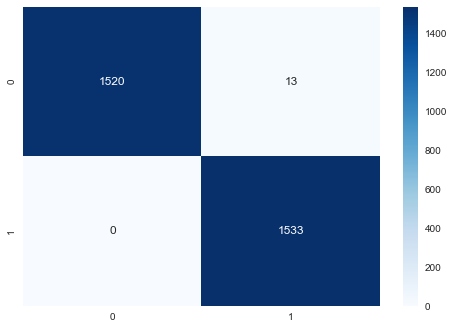

In [161]:
print("accuracy_score:",accuracy_score(y_test_balanced, y_pred6))
print("-------------------------------------------------------------------")
sns.heatmap(confusion_matrix(y_test_balanced,y_pred6), annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced,y_pred6)
print(c_report)

# Naive Bayes theorem:
   Naive Bayes is a statistical classification technique based on Bayes Theorem. It is one of the simplest supervised learning algorithms. Naive Bayes classifier is the fast, accurate and reliable algorithm. Naive Bayes classifiers have high accuracy and speed on large datasets.

In [162]:
#Import GuassianNB model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
NB_model=GaussianNB()
# Train the model using the training sets
NB_model.fit(x_balanced,y_balanced)

GaussianNB()

In [163]:
#Predict Output
y_pred7=NB_model.predict(x_test_balanced)
y_pred7

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [164]:
#Confusion matrix
confusion_mat = confusion_matrix(y_test_balanced,y_pred7)
confusion_mat

array([[1317,  216],
       [   4, 1529]])

In [165]:
#Accuracy
acc_NB = accuracy_score(y_test_balanced, y_pred7)
acc_NB 

0.9282452707110241

accuracy_score: 0.9282452707110241
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1533
           1       0.88      1.00      0.93      1533

    accuracy                           0.93      3066
   macro avg       0.94      0.93      0.93      3066
weighted avg       0.94      0.93      0.93      3066



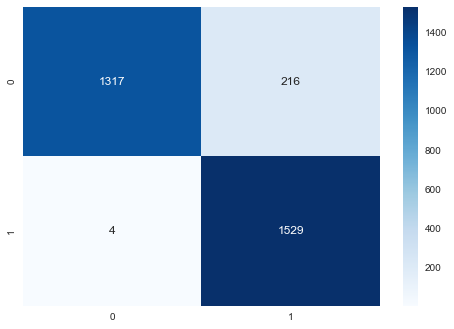

In [166]:

print("accuracy_score:",accuracy_score(y_test_balanced, y_pred7))
print("-------------------------------------------------------------------")
sns.heatmap(confusion_matrix(y_test_balanced,y_pred7), annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced,y_pred7)
print(c_report)

In [167]:
#Roc_auc_score
roc_auc_score_NB = roc_auc_score(y_test_balanced,y_pred7)
roc_auc_score_NB

0.9282452707110241

In [168]:
#F1score
F1score_NB =  f1_score(y_test_balanced,y_pred7)
#Recall
recall_NB = recall_score(y_test_balanced,y_pred7)

# Adaboost:

In [169]:
#Adaboostclassifer model
from sklearn.ensemble import AdaBoostClassifier
#create Adaboost classifier
model_ada=AdaBoostClassifier(random_state=123)
#Train the model using the training sets
model_ada.fit(x_balanced,y_balanced)
#Output predict
y_pred_ada=model_ada.predict(x_test_balanced)
y_pred_ada

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [170]:
#confusion matrix
confusion_mat = confusion_matrix(y_test_balanced,y_pred_ada)
confusion_mat

array([[1491,   42],
       [   0, 1533]])

In [171]:
#Accuracy
acc_ADA = accuracy_score(y_test_balanced, y_pred_ada)
acc_ADA

0.9863013698630136

In [172]:
#Roc_auc_score
roc_auc_score_ADA = roc_auc_score(y_test_balanced,y_pred_ada)
roc_auc_score_ADA

0.9863013698630136

In [173]:
#F1score
F1score_Ada =  f1_score(y_test_balanced,y_pred_ada)
#Recall
recall_Ada = recall_score(y_test_balanced,y_pred_ada)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1533
           1       0.97      1.00      0.99      1533

    accuracy                           0.99      3066
   macro avg       0.99      0.99      0.99      3066
weighted avg       0.99      0.99      0.99      3066



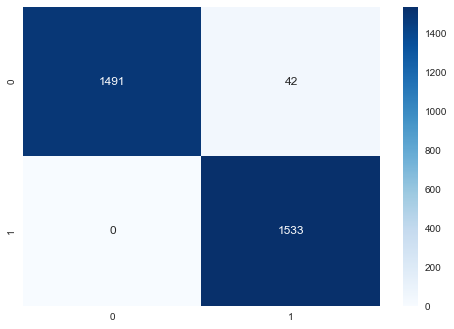

In [174]:

sns.heatmap(confusion_mat, annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced,y_pred_ada)
print(c_report)

[[6101    0]
 [   0 6101]]
---------------------------------------------------------------------------
accuracy_score: 1.0
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6101
           1       1.00      1.00      1.00      6101

    accuracy                           1.00     12202
   macro avg       1.00      1.00      1.00     12202
weighted avg       1.00      1.00      1.00     12202



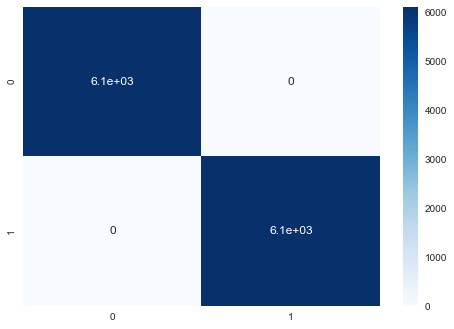

In [175]:
# Train prediction:
y_train_pred =model_ada.predict(x_balanced)
print(confusion_matrix(y_balanced,y_train_pred))
print("---------------------------------------------------------------------------")
print("accuracy_score:",accuracy_score(y_balanced, y_train_pred))
print("-------------------------------------------------------------------")
sns.heatmap(confusion_matrix(y_balanced,y_train_pred), annot = True ,cmap = "Blues")
c_report = classification_report(y_balanced,y_train_pred)
print(c_report)

# Hyperparameter  Tuning: GridSearchCV

In [176]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [177]:
#Cross validation:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(x_balanced,y_balanced).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,x_balanced,y_balanced,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, "score", score)

1 score 0.9993443294262967
2 score 0.9993443294262967
3 score 1.0


In [178]:
#create ada boost classifier
ada=AdaBoostClassifier()
search_grid={'n_estimators':[200,500,600],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

In [179]:
#Train the model using train sets usig hyper parameter 
search.fit(x_balanced,y_balanced)
search.best_params_
search.best_score_

1.0

In [180]:
from sklearn.model_selection import cross_validate

In [181]:
ad_validation = AdaBoostClassifier(n_estimators = 50,random_state =2)

ad_validation_scores = cross_validate(ad_validation,x_balanced,y_balanced,scoring = ['accuracy','precision','recall'],cv = 10)
ad_validation_scores 

{'fit_time': array([0.33301806, 0.3242383 , 0.32173395, 0.31959915, 0.35555792,
        0.32681894, 0.31701088, 0.31183624, 0.31888604, 0.32576013]),
 'score_time': array([0.01483607, 0.01362395, 0.01420403, 0.0132947 , 0.01743627,
        0.01466322, 0.01326704, 0.01333189, 0.01321602, 0.01335692]),
 'test_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

In [182]:
ad_validation_scores = pd.DataFrame(ad_validation_scores )
ad_validation_scores

fit_time  score_time  test_accuracy  test_precision  test_recall
0  0.333018    0.014836            1.0             1.0          1.0
1  0.324238    0.013624            1.0             1.0          1.0
2  0.321734    0.014204            1.0             1.0          1.0
3  0.319599    0.013295            1.0             1.0          1.0
4  0.355558    0.017436            1.0             1.0          1.0
5  0.326819    0.014663            1.0             1.0          1.0
6  0.317011    0.013267            1.0             1.0          1.0
7  0.311836    0.013332            1.0             1.0          1.0
8  0.318886    0.013216            1.0             1.0          1.0
9  0.325760    0.013357            1.0             1.0          1.0

In [183]:
ad_validation_scores.mean()

fit_time          0.325446
score_time        0.014123
test_accuracy     1.000000
test_precision    1.000000
test_recall       1.000000
dtype: float64

#### Gradient Boosting

In [184]:
#Gradient Boosting CLassifier modle
from sklearn.ensemble import GradientBoostingClassifier

In [185]:
#Create GradientBoosting classifier
model_GB=GradientBoostingClassifier(random_state=2)
model_GB.fit(x_balanced,y_balanced)

GradientBoostingClassifier(random_state=2)

In [186]:
#Train the model
y_pred_GB=model_GB.predict(x_test_balanced)

In [187]:
#Confusion matrix
confusion_mat = confusion_matrix(y_test_balanced,y_pred_GB)
confusion_mat

array([[1491,   42],
       [   0, 1533]])

In [188]:
#Accuracy:
acc_GB = accuracy_score(y_test_balanced, y_pred_GB)
acc_GB

0.9863013698630136

In [189]:
y_balanced.shape

(12202,)

In [190]:
#F1Score
F1score_GB =  f1_score(y_test_balanced,y_pred_GB)
#Recall
recall_GB = recall_score(y_test_balanced,y_pred_GB)

In [191]:
#Roc_auc_score
roc_auc_score_GB = roc_auc_score(y_test_balanced,y_pred_GB)
roc_auc_score_GB

0.9863013698630136

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1533
           1       0.97      1.00      0.99      1533

    accuracy                           0.99      3066
   macro avg       0.99      0.99      0.99      3066
weighted avg       0.99      0.99      0.99      3066



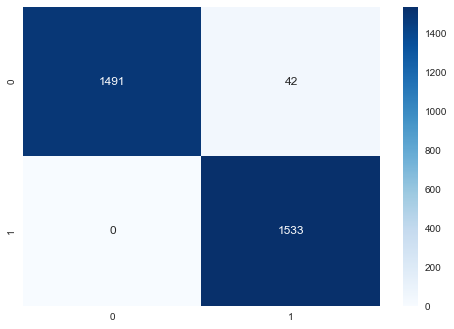

In [192]:

sns.heatmap(confusion_mat, annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced,y_pred_GB)
print(c_report)

# Feature Selection using Recursive Feature Elimination:

In [193]:
from sklearn.feature_selection import RFE

In [194]:
#Create RFE model
FS_Recursive = RFE(model_GB)
fit = FS_Recursive.fit(x_balanced,y_balanced)

In [195]:
fit.support_

array([ True, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True,  True])

In [196]:
#Rank the Feature
fit.ranking_

array([ 1, 10,  9,  6,  8,  1,  1,  3,  2,  5,  1,  7,  1,  4,  1,  1,  1])

In [197]:
#Dataframe
scores1 = pd.DataFrame(fit.ranking_,columns = ['Score'])
dfcolumns = pd.DataFrame(x_balanced.columns)


In [198]:
feature_rank1 = pd.concat([dfcolumns,scores1],axis = 1)

In [199]:
feature_rank1.columns = ['Features','Score']
feature_rank1

Features  Score
0                    ID      1
1           CODE_GENDER     10
2          FLAG_OWN_CAR      9
3       FLAG_OWN_REALTY      6
4          CNT_CHILDREN      8
5      AMT_INCOME_TOTAL      1
6      NAME_INCOME_TYPE      1
7   NAME_EDUCATION_TYPE      3
8    NAME_FAMILY_STATUS      2
9     NAME_HOUSING_TYPE      5
10           DAYS_BIRTH      1
11      FLAG_WORK_PHONE      7
12           FLAG_PHONE      1
13           FLAG_EMAIL      4
14      OCCUPATION_TYPE      1
15      CNT_FAM_MEMBERS      1
16               STATUS      1

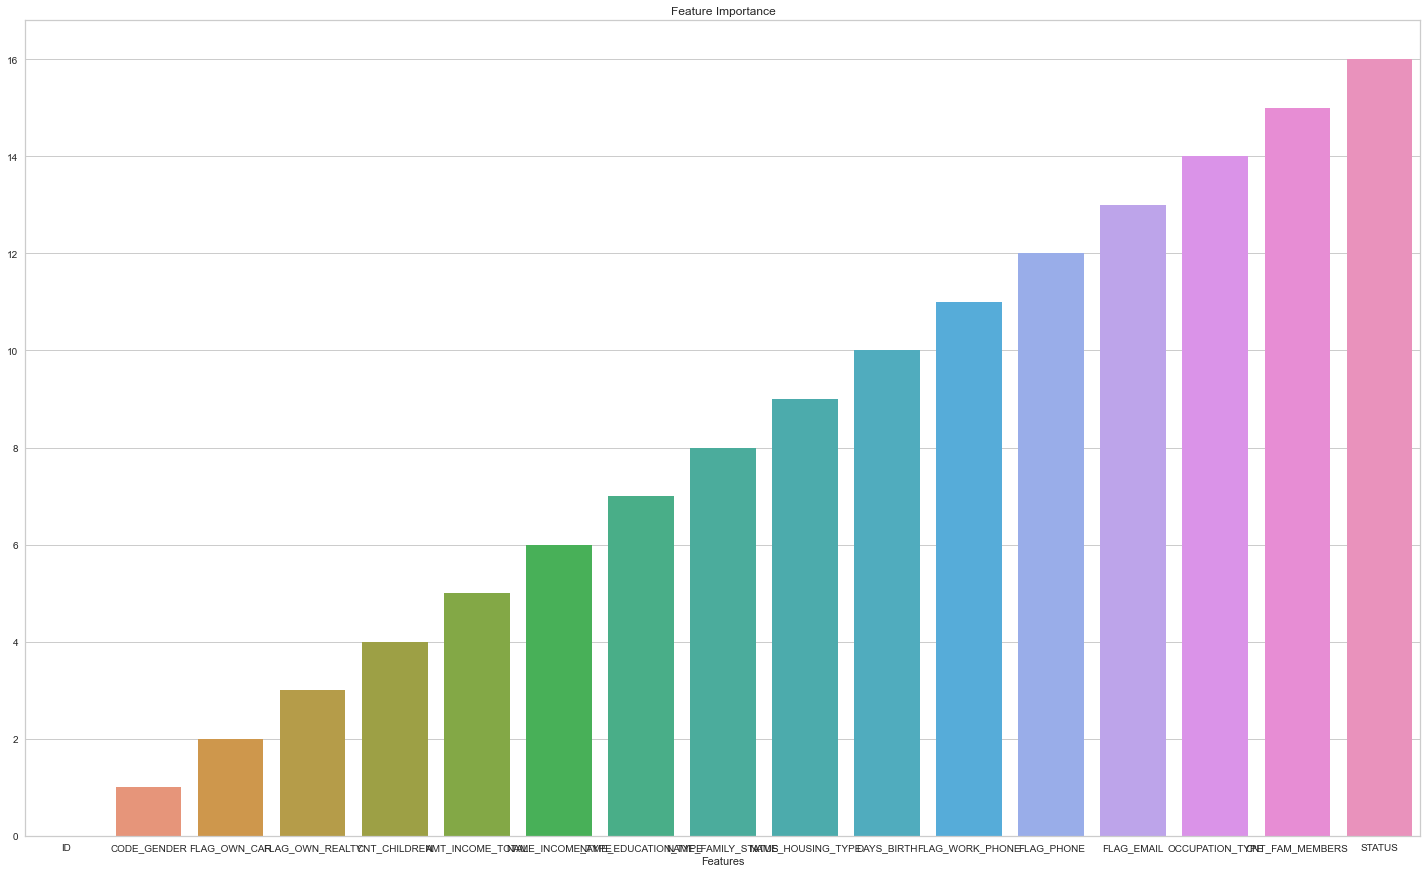

In [200]:
#Barplot
plt.figure(figsize= (25,15))
sns.barplot(x=feature_rank1["Features"], y=feature_rank1.index)
plt.title("Feature Importance")
plt.show()

In [201]:
# Feature with rank 1:
col_to_use = ['ID','AMT_INCOME_TOTAL','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','DAYS_BIRTH','OCCUPATION_TYPE','CNT_FAM_MEMBERS','STATUS']

In [202]:
#Combine the RFE feature to dataset:
mydata_rfe =df1[col_to_use]
mydata_rfe.head()

ID  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0  5008838          405000.0                 0                    1   
1  5008839          405000.0                 0                    1   
2  5008840          405000.0                 0                    1   
3  5008841          405000.0                 0                    1   
4  5008842          405000.0                 0                    1   

   DAYS_BIRTH  OCCUPATION_TYPE  CNT_FAM_MEMBERS  STATUS  
0      -11842               10              3.0       7  
1      -11842               10              3.0       6  
2      -11842               10              3.0       6  
3      -11842               10              3.0       7  
4      -11842               10              3.0       0

In [203]:
#Number of rows and column after feature elimination
print("Number of rows and column after feature elimination :",mydata_rfe.shape)

Number of rows and column after feature elimination : (9496, 8)


In [204]:
x = mydata_rfe.iloc[:,:8]

In [205]:
y = df1['cluster']

In [206]:
# Train and Test split
from sklearn.model_selection import train_test_split
x_train_rfe,x_test_rfe,y_train_rfe,y_test_rfe=train_test_split(x,y,test_size=0.2,random_state=2)

In [207]:
x_train_rfe.shape

(7596, 8)

In [208]:
x_test_rfe.shape

(1900, 8)

In [209]:
#Standardization: MinMaxScale
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_scaled_rfe = pd.DataFrame(scale.fit_transform(x_train_rfe), columns=x_train_rfe.columns)
x_test_scaled_rfe= pd.DataFrame(scale.fit_transform(x_test_rfe), columns=x_test_rfe.columns)

In [210]:
#Oversampling: SMOTE
from imblearn.over_sampling import SMOTE
oversample_rfe = SMOTE()
x_balanced_rfe, y_balanced_rfe = oversample_rfe.fit_resample(x_scaled_rfe, y_train_rfe)
x_test_balanced_rfe, y_test_balanced_rfe = oversample_rfe.fit_resample(x_test_scaled_rfe, y_test)

In [211]:
#Create gradientBoosting classifier
model_GB_rfe=GradientBoostingClassifier(random_state=2)
model_GB_rfe.fit(x_balanced_rfe,y_balanced_rfe)

GradientBoostingClassifier(random_state=2)

In [212]:
#Predict output
y_pred_GB_rfe=model_GB_rfe.predict(x_test_balanced_rfe)

In [213]:
#Confusion matrix
confusion_mat = confusion_matrix(y_test_balanced_rfe,y_pred_GB_rfe)
confusion_mat

array([[1490,   43],
       [   0, 1533]])

In [214]:
#F1 score
F1score_GB_rfe =  f1_score(y_test_balanced,y_pred_GB_rfe)
#Recall
recall_GB_rfe = recall_score(y_test_balanced,y_pred_GB_rfe)

accuracy_score: 0.9859752120026093
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1533
           1       0.97      1.00      0.99      1533

    accuracy                           0.99      3066
   macro avg       0.99      0.99      0.99      3066
weighted avg       0.99      0.99      0.99      3066



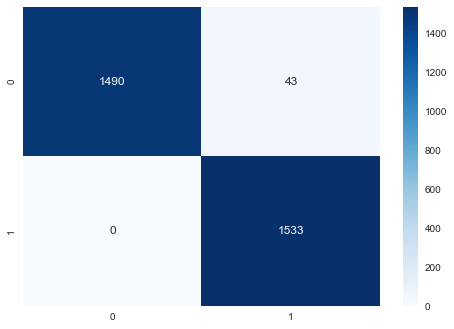

In [215]:
#Accuracy and classification report
print("accuracy_score:",accuracy_score(y_test_balanced_rfe, y_pred_GB_rfe))
print("-------------------------------------------------------------------")
sns.heatmap(confusion_matrix(y_test_balanced_rfe,y_pred_GB_rfe), annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced_rfe,y_pred_GB_rfe)
print(c_report)

# Decision Tree:

In [216]:
df.head()

ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008838            1             0                1             1   
1  5008839            1             0                1             1   
2  5008840            1             0                1             1   
3  5008841            1             0                1             1   
4  5008842            1             0                1             1   

   AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0          405000.0                 0                    1   
1          405000.0                 0                    1   
2          405000.0                 0                    1   
3          405000.0                 0                    1   
4          405000.0                 0                    1   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                   1                  1      -11842          -2016   
1                   1                  1      -11842          -2016   
2                   1                  1      -11842          -2016   
3                   1                  1      -11842          -2016   
4                   1                  1      -11842          -2016   

   FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                0           0           0               10              3.0   
1                0           0           0               10              3.0   
2                0           0           0               10              3.0   
3                0           0           0               10              3.0   
4                0           0           0               10              3.0   

   STATUS  cluster  
0       7        1  
1       6        1  
2       6        1  
3       7        1  
4       0        1

In [217]:
x_ind = df.iloc[:,:19]
y_dep = df['cluster']

In [218]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,train_size = 0.8, random_state = 2)

In [219]:
#Decision Tree model:
from sklearn import tree
#Create Decision Tree Classifier:
model_DT = tree.DecisionTreeClassifier()

In [220]:
#Train the model
model_DT.fit(x_balanced,y_balanced)

DecisionTreeClassifier()

In [221]:
#predict output:
y_pred_DT = model_DT.predict(x_test_balanced)
y_pred_DT

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [222]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [223]:
#Confusion matrix:
confusion_matrix(y_test_balanced,y_pred_DT)

array([[1490,   43],
       [   0, 1533]])

In [224]:
#F1score_DT:
F1score_DT =  f1_score(y_test_balanced,y_pred_DT)
#Recall

recall_DT = recall_score(y_test_balanced,y_pred_DT)

In [225]:
#Roc_Auc_curve
roc_auc_score_DT= roc_auc_score(y_test_balanced,y_pred_DT)
roc_auc_score_DT

0.9859752120026093

In [226]:
#Accuracy
acc_DT = accuracy_score(y_test_balanced,y_pred_DT)
acc_DT

0.9859752120026093

[Text(178.56, 261.6075, 'X[5] <= 0.268\ngini = 0.5\nsamples = 12202\nvalue = [6101, 6101]'),
 Text(89.28, 186.8625, 'gini = 0.0\nsamples = 6093\nvalue = [6093, 0]'),
 Text(267.84000000000003, 186.8625, 'X[5] <= 0.271\ngini = 0.003\nsamples = 6109\nvalue = [8, 6101]'),
 Text(178.56, 112.1175, 'X[6] <= 0.75\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(89.28, 37.3725, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(267.84000000000003, 37.3725, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(357.12, 112.1175, 'gini = 0.0\nsamples = 6088\nvalue = [0, 6088]')]

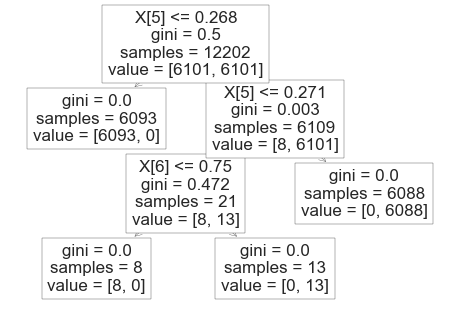

In [227]:
tree.plot_tree(model_DT,max_depth=4)

# Hyperparameter Tuning : RandiomizedSearchCV

In [228]:
from sklearn.model_selection import RandomizedSearchCV
#parameter:
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),
            'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=parameters,cv=5)
DT_hp.fit(x_balanced,y_balanced)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (10, 20, 30, 40, 50, 60,
                                                      70, 100),
                                        'max_features': ('log2', 'auto',
                                                         'sqrt'),
                                        'min_samples_split': (2, 4, 6)})

In [229]:
DT_hp.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_split=4)

In [230]:
#model Building after randomized CV
model_after_HT=tree.DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [231]:
model_after_HT=model_after_HT.fit(x_balanced,y_balanced)

In [232]:
y_pred_after_hT=model_after_HT.predict(x_test_balanced)
confusion_matrix(y_test_balanced,y_pred_after_hT)

array([[1497,   36],
       [  29, 1504]])

In [233]:
roc_auc_score_DT= roc_auc_score(y_test_balanced,y_pred_DT)
roc_auc_score_DT

0.9859752120026093

In [234]:
accuracy_score(y_test_balanced,y_pred_after_hT)

0.9787997390737116

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1533
           1       0.98      0.98      0.98      1533

    accuracy                           0.98      3066
   macro avg       0.98      0.98      0.98      3066
weighted avg       0.98      0.98      0.98      3066



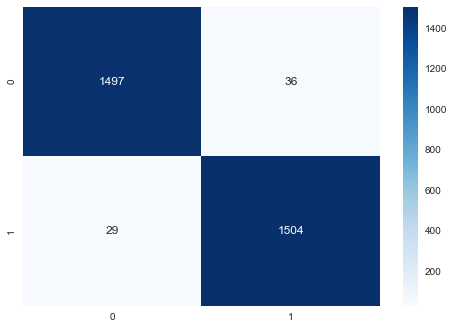

In [235]:
sns.heatmap(confusion_matrix(y_test_balanced,y_pred_after_hT), annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced,y_pred_after_hT)
print(c_report)

### Random Forest:

In [236]:
from sklearn.ensemble import RandomForestClassifier

In [237]:
#RandomForest model
model_rf = RandomForestClassifier(random_state = 2)
#create Random Forest classifier
model_rf = model_rf.fit(x_balanced,y_balanced)

In [238]:
#predict output
y_pred_RF = model_rf.predict(x_test_balanced)
y_pred_RF

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [239]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix_RF = confusion_matrix(y_test_balanced,y_pred_RF)
confusion_matrix_RF

array([[1493,   40],
       [   0, 1533]])

In [240]:
#F1score
F1score_RF =  f1_score(y_test_balanced,y_pred_RF)
#Recall
recall_RF = recall_score(y_test_balanced,y_pred_RF)

In [241]:
#Accuracy
acc_RF = accuracy_score(y_test_balanced,y_pred_RF)
acc_RF

0.9869536855838226

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1533
           1       0.97      1.00      0.99      1533

    accuracy                           0.99      3066
   macro avg       0.99      0.99      0.99      3066
weighted avg       0.99      0.99      0.99      3066



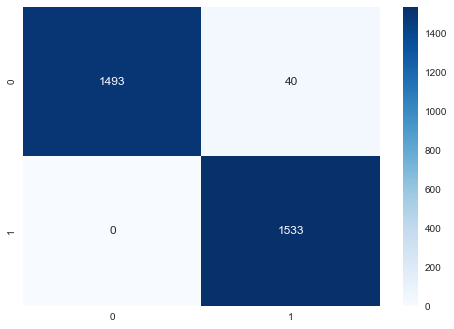

In [243]:
sns.heatmap(confusion_matrix_RF, annot = True ,cmap = "Blues",fmt = 'd')
c_report = classification_report(y_test_balanced,y_pred_RF)
print(c_report)

In [244]:
model_c = RandomForestClassifier(criterion = 'entropy',random_state = 2)

In [245]:
model_c = model_c.fit(x_balanced,y_balanced)

In [246]:
y_pred_c = model_c.predict(x_test_balanced)
y_pred_c

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [247]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix_c = confusion_matrix(y_test_balanced,y_pred_c)
confusion_matrix_c

array([[1493,   40],
       [   0, 1533]])

In [248]:
accuracy_score(y_test_balanced,y_pred_c)

0.9869536855838226

### Model Performance:

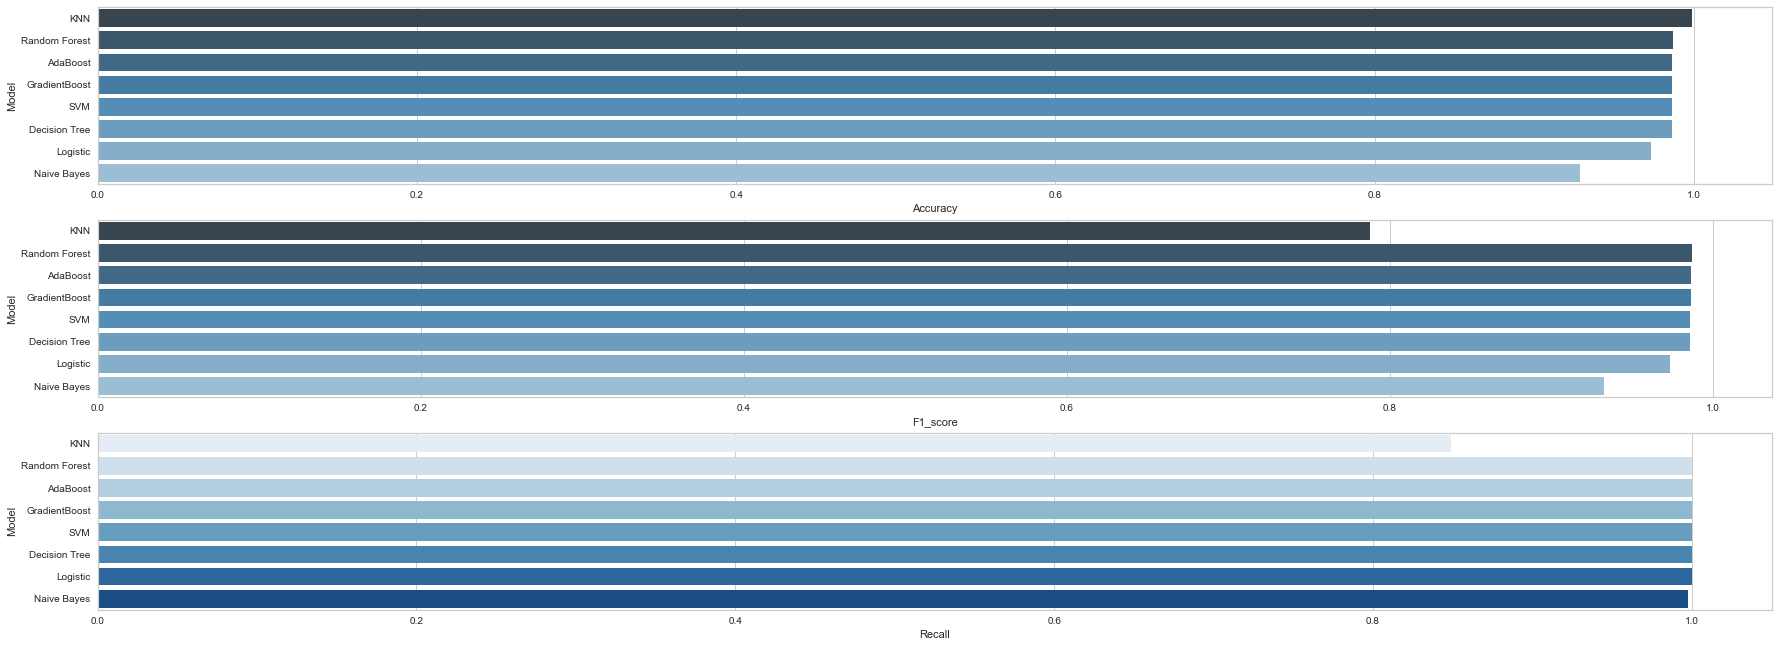

In [249]:
compare_acc = pd.DataFrame({"Model": [ "Logistic","SVM", "KNN","Naive Bayes", "Decision Tree", "Random Forest", "AdaBoost", "GradientBoost"],
                            "Accuracy": [ acc_LR,acc_SVM, acc_KNN,acc_NB,acc_DT, acc_RF, acc_ADA,acc_GB],
                           "F1_score" : [F1score_LR,F1score_SVM,F1score_KNN,F1score_NB,F1score_DT,F1score_RF,F1score_Ada,F1score_GB],
                           "Recall" : [recall_LR,recall_SVM,recall_KNN,recall_NB,recall_DT,recall_RF,recall_Ada,recall_GB],
                           })
def lables(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
        p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
        '{:1.3f}'.format(width),             # set variable to display, 2 decimals
        ha = 'left',                         # horizontal alignment
        va = 'center') 
                           
plt.figure(figsize =(30,15))                           
plt.subplot(411)
compare_acc = compare_acc.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare_acc, palette="Blues_d")



#plt.figure(figsize =(20,10))                           
plt.subplot(412)
compare_f1 = compare_acc.sort_values(by="F1_score", ascending=False)
ax=sns.barplot(x="F1_score", y="Model", data=compare_acc, palette="Blues_d")

#plt.figure(figsize =(20,10))                           
plt.subplot(413)
compare_recall = compare_acc.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare_acc, palette="Blues")

In [250]:
Model_accuracy = compare_acc.reset_index()
Model_accuracy

index          Model  Accuracy  F1_score    Recall
0      2            KNN  0.998607  0.787769  0.848663
1      5  Random Forest  0.986954  0.987122  1.000000
2      6       AdaBoost  0.986301  0.986486  1.000000
3      7  GradientBoost  0.986301  0.986486  1.000000
4      1            SVM  0.985975  0.986169  1.000000
5      4  Decision Tree  0.985975  0.986169  1.000000
6      0       Logistic  0.972929  0.973642  1.000000
7      3    Naive Bayes  0.928245  0.932886  0.997391

### Deep learninng:

### Aritfical Neural Network - ANN

In [251]:
import tensorflow as tf

In [252]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [253]:
model_ANN=Sequential()

In [254]:
#first hidden layer
model_ANN.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=17))
#second hidden layer
model_ANN.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
model_ANN.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [255]:
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1800      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 6,901
Trainable params: 6,901
Non-trainable params: 0
_________________________________________________________________


In [256]:
model_ANN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [257]:
model1_ANN= model_ANN.fit(x_balanced,y_balanced,batch_size=100,epochs=100)

Epoch 1/100
123/123 [==============================] - 1s 933us/step - loss: 0.5187 - accuracy: 0.7396
Epoch 2/100
123/123 [==============================] - 0s 983us/step - loss: 0.2635 - accuracy: 0.9214
Epoch 3/100
123/123 [==============================] - 0s 792us/step - loss: 0.1265 - accuracy: 0.9752
Epoch 4/100
123/123 [==============================] - 0s 799us/step - loss: 0.0734 - accuracy: 0.9886
Epoch 5/100
123/123 [==============================] - 0s 731us/step - loss: 0.0510 - accuracy: 0.9907
Epoch 6/100
123/123 [==============================] - 0s 725us/step - loss: 0.0467 - accuracy: 0.9878
Epoch 7/100
123/123 [==============================] - 0s 735us/step - loss: 0.0316 - accuracy: 0.9947
Epoch 8/100
123/123 [==============================] - 0s 760us/step - loss: 0.0443 - accuracy: 0.9859
Epoch 9/100
123/123 [==============================] - 0s 748us/step - loss: 0.0219 - accuracy: 0.9966
Epoch 10/100
123/123 [==============================] - 0s 735us/step - l

In [258]:
y_pred_ANN=model.predict(x_test_balanced)
y_pred_ANN

array([0, 1, 0, ..., 1, 1, 1], dtype=int32)

In [259]:
y_pred_ANN=(y_pred_ANN>0.5)

In [260]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [261]:
accuracy_score(y_pred_ANN,y_test_balanced)

0.9859752120026093

In [262]:
confusion_matrix(y_pred_ANN,y_test_balanced)

array([[1490,    0],
       [  43, 1533]])

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1533
           1       0.97      1.00      0.99      1533

    accuracy                           0.99      3066
   macro avg       0.99      0.99      0.99      3066
weighted avg       0.99      0.99      0.99      3066



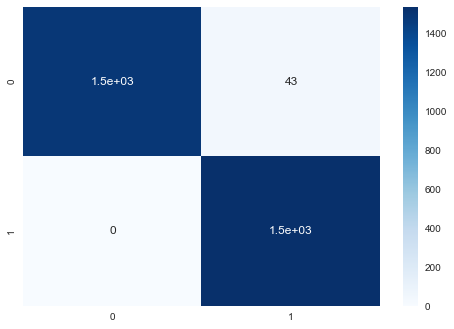

In [263]:
sns.heatmap(confusion_matrix(y_test_balanced,y_pred_ANN), annot = True ,cmap = "Blues")
c_report = classification_report(y_test_balanced,y_pred_ANN)
print(c_report)

In [264]:
print(model1_ANN.history.keys())

dict_keys(['loss', 'accuracy'])


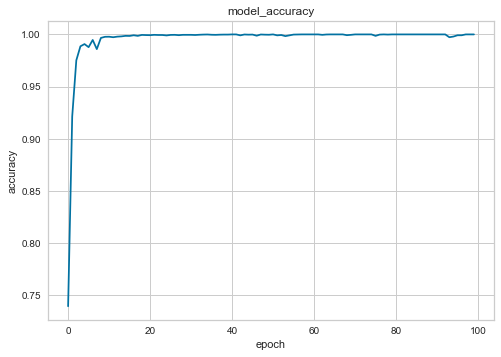

In [265]:
plt.plot(model1_ANN.history['accuracy'])
plt.title("model_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

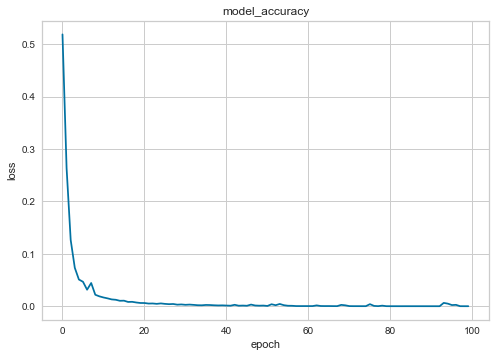

In [266]:
plt.plot(model1_ANN.history['loss'])
plt.title("model_accuracy")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Conclusion:
The objective of this paper is to train multiple supervised learning algorithms to predict
customers behavior on paying off credit card balance. We first investigated the data
by using the exploratory data analysis techniques including cleaning missing or invalid values
and exploring the relationship between different features. The bar chart helps to visualize the
relationships between features and important features. We started with the logistic regression
algorithm, then built a KNN which has a better performance than the former model. Next, we
experimented with an AdaBoosting model and compared it with the Gradient Boosting model.
The prediction accuracy rate of AdaBoosting model is higher than the Gradient Boosting
model. At the end, we also tried to build a neural network with two hidden layers and
hidden layer. By using the ROC curve andconfusion matrix to evaluate the model
performance, we conclude that the AdaBoostingmodel and neural network are the two most
effective models to predict the output.According to the bar chart of feature importance
score, the feature “STATUS” is the most significant one and its represents at first position
bar graph. This feature not only indicates that the customers payment behavior in September,
it also indicates the overall behavior. Therefore, when the financial institution considers
issuing the client a credit card, it is very important for the institutionto check the payment
history of that person because the decision on whether pay on duly or owe the bill on a
specific month usually relates to the previous payment history. For instance, if a person
owes numerous bills already, he or she is likely to delay the payment of current month unless
the total arrears can be paid off .Besides the payment history, it is also very important to look
at the applicants’ imit of their current credit cards. Although the financial institution often
collects clients’ personal information such as age,educational level and marital status when
people apply for the credit cards, this information rarely affects the default behavior. In the
other word, Banks should equally consider their potential clients who are men or women,
obtain bachelor degrees or masterdegrees, single or married when decide whether approve their
credit card/loan applications. Even though I tried my best to make a thorough analysis, there
are still a few possible improvements that may require longer-term action. For the boosting
models, I only trainedAdaBoost and Gradient Boosting models this time but I can try
XGBoosting to see whether it will generate a better result as it is one of the most robust and
popular boosting algorithms. Moreover, I can also improve my data collection and entry in the
future.Thus, I am confident to say that my model is accurate in predicting whether a person
will default or not, as I will have more inputs

### References:
1. https://towardsdatascience.com/how-to-build-a-machine-learning-model-to-identifycredit-
card-fraud-in-5-stepsa-hands-on-modeling-5140b3bd19f1
2. https://journalofbigdata.springeropen.com/articles/10.1186/s40537-021-00461-7
3. https://medium.datadriveninvestor.com/predicting-credit-card-approvals-using-mltechniques-
9cd8eaeb5b8c
4. https://www.researchgate.net/publication/348755769_Application_of_Deep_Learning
_for_Credit_Card_Approval_A_Comparison_with_Two_Machine_Learning_Techniq
ues